In [3]:
output_dir = 'model_output/cartpole/'

In [4]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Trading

### External Packages

In [1]:
import os # for creating directories
import matplotlib
matplotlib.use('TkAgg')
import numpy as np

### Custom library imports

In [78]:
from library.market_modelsM import market
#from library.local_environments import agent_environmentM
from library.market_modelsM import bs_stock
import library.agents
import library.simulations
#import library.WIPAgents
import library.WIPAgentsv2
import library.WIPAgentsv3
import library.WIPAgentsv4

- *market_models* include stock price models and market impact models.
- *local_environments* includes agent environments (recording the agents position, cash and market impact, these are built to model AIGym environments
- *agents* include market agents, different deepQlearning agents and theoretical baseline agents
- *simulator* simplifies the training and evaluation of multiple agents

Start with an agent (Fred) who only knows the position and the time. Take the trade options as %s of the total position. For now we assume that he can trade between 1% and 10% at a time (Restrictive - could we make this more flexible?) A uniform partition also doesn't necessarily seem appropriate. Look at continuous generalisations.

### Code using new Simulator class

Reload any updated modules

In [146]:
from imp import reload
reload(library.agents)
reload(library.simulations)
#reload(library.WIPAgents)
reload(library.WIPAgentsv2)
reload(library.WIPAgentsv4)

<module 'library.WIPAgentsv4' from '/Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/library/WIPAgentsv4.py'>

In [46]:
from imp import reload
reload(library.simulations)
reload(library.agents.distAgentsWIP2.C51Agent)

TypeError: reload() argument must be a module

Initialisation and parameters

To speed up model identification and differentiation:
- Fred: Deep Q Network Model (standard params) 
- George: Deep Q Network Model (alternative params)
- Greg: Deep Q Network Model with Target network
- Alice: Double Deep Q Network Model
- Rob: Random strategy
- Tim: TWAP
- David: Distributional RL state action value
- Daisy: Distributional RL state value
- Paul: Version of Daisy with larger network and 2 epochs of training (how can we use the data more efficiently?)

Future:
- Harry: Prioritised sweep


### Simulated Data

In [48]:
from imp import reload
import library.agents.distAgentsWIP2, library.simulations2, library.agents.baseAgents, library.market_modelsM
reload(library.agents.distAgentsWIP2)
reload(library.simulations2)
reload(library.market_modelsM)

lr = 0.0001
ucbc = 80
th = 4
tl = 50

params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 1,
    "batch_size" : 32,
    "action_values" : [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
                        # [0.001,0.005,0.01,0.015,0.02,0.03,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35]
}
state_size = 2
harry = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], f"240s lr {lr} UCBc {ucbc} tl {tl} th {th}",C=tl, alternative_target = True,UCB=True,UCBc = ucbc,tree_horizon = th,n_hist_data=0,n_hist_inputs=0,orderbook =False)#,market_data_size=n_hist_prices)
tim = library.agents.baseAgents.TWAPAgent(5,"TEST TWAP",11)
agent = harry

agent.learning_rate = lr

simple_stock = library.market_modelsM.bs_stock(1,0,0.0005,n_steps = 240) # No drift, 0.0005 vol
simple_market = library.market_modelsM.market(simple_stock)
simple_market.k *= 100000

my_simulator = library.simulations2.simulator(simple_market,agent,params,test_name = "Simulted Results",orderbook = False)
my_simulator.train(10000,epsilon_decay =0.9999)

trade freq 24


wandb: Wandb version 0.9.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


KeyboardInterrupt: 

Error in callback <function _init_jupyter.<locals>.cleanup at 0x147d18598> (for post_run_cell):


KeyboardInterrupt: 

In [57]:
from imp import reload
import library.agents.distAgentsWIP2, library.simulations2, library.agents.baseAgents, library.market_modelsM, library.agents.valueAgents
reload(library.agents.valueAgents)
lr = 0.0001
ucbc = 150
th = 4
tl = 50
N = 200

params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 1,
    "batch_size" : 32,
    "action_values" : [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
                        # [0.001,0.005,0.01,0.015,0.02,0.03,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35]
}
state_size = 2
harry = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "Sim QR Mod2",C=tl,N=N, alternative_target = True,UCB=True,UCBc = ucbc,tree_horizon = th,n_hist_data=0,n_hist_inputs=0,orderbook =False)#,market_data_size=n_hist_prices)
alice = library.agents.valueAgents.DDQNAgent(state_size, len(params["action_values"]), "Sim DDQN Mod2",C=tl, alternative_target = True,tree_horizon=th)
tim = library.agents.baseAgents.TWAPAgent(5,"TWAP Test",21)
agent = tim
#agent.learning_rate = lr


simple_stock = library.market_modelsM.bs_stock(1,0,0.0017,n_steps = 10) # No drift, 0.0005 vol
simple_market = library.market_modelsM.market(simple_stock)
simple_market.k = 0.0186 # 0.02
simple_market.b = 0.0 # 0.01

my_simulator = library.simulations2.simulator(simple_market,agent,params,test_name = "DDQN_Net_Sweep",orderbook = False)
my_simulator.train(100000,epsilon_decay =0.9999)

trade freq 1


wandb: Wandb version 0.9.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [61]:
import wandb
new_run = wandb.init(project="OptEx",name = "TWAP Avg")
for i in range(210):
    new_run.log({'episode': i * 500, 'eval_rewards': 0.9814})

wandb: Wandb version 0.9.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [55]:
alice.model_units

11

Error in callback <function _init_jupyter.<locals>.cleanup at 0x147d400d0> (for post_run_cell):


KeyboardInterrupt: 

In [17]:
harry.evaluate = False

In [19]:
harry.evaluate = True
my_simulator.episode(evaluate = True, verbose=True)

Predict [[0.97844243 0.97870135 0.97895825 0.97914964 0.9792448  0.9792994
  0.97921866 0.9791033  0.97898793 0.97887254 0.97875714]]
State:  [[ 1. -1.]] Actions:  5 Rewards:  0.09797705778700579 Next_states:  [[ 0.8 -0.8]] Done:  False
Predict [[0.88043886 0.88069737 0.8809558  0.88117015 0.88126534 0.88131475
  0.8812373  0.8811219  0.8810065  0.8808911  0.88077575]]
State:  [[ 0.8 -0.8]] Actions:  5 Rewards:  0.09799270117798758 Next_states:  [[ 0.6 -0.6]] Done:  False
Predict [[0.7824348  0.78269327 0.78295183 0.78318286 0.7832858  0.78333014
  0.7832559  0.7831405  0.7830251  0.7829097  0.7827943 ]]
State:  [[ 0.6 -0.6]] Actions:  5 Rewards:  0.09797208878237645 Next_states:  [[ 0.4 -0.4]] Done:  False
Predict [[0.6844412  0.6846995  0.68495774 0.6851958  0.6853156  0.6853545
  0.6852833  0.6851676  0.6850519  0.6849363  0.68482065]]
State:  [[ 0.4 -0.4]] Actions:  5 Rewards:  0.09794786461345284 Next_states:  [[ 0.2 -0.2]] Done:  False
Predict [[0.5864925  0.58675075 0.5870089  0

{}

In [18]:

my_simulator.train(100000,epsilon_decay =0.9999)

wandb: Wandb version 0.9.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
/Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/library/agents/distAgentsWIP2.py:81: RuntimeWarning: invalid value encountered in sqrt
  act = np.argmax(act_values[0] + self.ct * np.sqrt(self.variance(state)))
requests_with_retry encountered retryable exception: ('Connection aborted.', OSError("(60, 'ETIMEDOUT')")). args: ('https://api.wandb.ai/files/tobyg/OptEx/28q2skmz/file_stream',), kwargs: {'json': {'files': {'wandb-events.jsonl': {'offset': 125, 'content': ['{"system.cpu": 35.57, "system.memory": 72.84, "system.disk": 44.5, "system.proc.memory.availableMB": 2225.05, "system.proc.memory.rssMB": 151.19, "system.proc.memory.percent": 1.85, "system.proc.cpu.threads": 35.0, "system.network.sent": 49173504, "system.network.recv": 111850496, "_wandb": true, "_timestamp": 1596014654, "_runtime": 9899}\n']}, 'wandb-history.jsonl': {'offset': 2508, 'content': ['{"episode": 9513, "

requests_with_retry encountered retryable exception: HTTPSConnectionPool(host='api.wandb.ai', port=443): Max retries exceeded with url: /files/tobyg/OptEx/28q2skmz/file_stream (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x14684eb38>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')). args: ('https://api.wandb.ai/files/tobyg/OptEx/28q2skmz/file_stream',), kwargs: {'json': {'files': {'wandb-events.jsonl': {'offset': 165, 'content': ['{"system.cpu": 38.53, "system.memory": 79.24, "system.disk": 44.6, "system.proc.memory.availableMB": 1701.31, "system.proc.memory.rssMB": 42.66, "system.proc.memory.percent": 0.52, "system.proc.cpu.threads": 35.0, "system.network.sent": 60082176, "system.network.recv": 139495424, "_wandb": true, "_timestamp": 1596028266, "_runtime": 23510}\n']}, 'wandb-history.jsonl': {'offset': 3322, 'content': ['{"episode": 12613, "act_val0": 0.9787362813949585, "_runtime": 23082.6255047

KeyboardInterrupt: 

In [27]:
print(my_simulator.env.step_size)
print(1/240)
print(my_simulator.m.stock.terminal)

0.004166666666666667
0.004166666666666667
1


In [22]:
my_simulator.env.debug = True
my_simulator.episode(verbose=True)

Selling 0.0033333333333333335 for 0.0033284632113699916
Selling 0.0033333333333333335 for 0.003328437711484513
Selling 0.0033333333333333335 for 0.0033282747241241846
Selling 0.0033333333333333335 for 0.003328102491266918
Selling 0.0033333333333333335 for 0.0033280311299914937
Selling 0.0033333333333333335 for 0.003328163897952189
Selling 0.0033333333333333335 for 0.003328054313928536
Selling 0.0033333333333333335 for 0.0033280618485335566
Selling 0.0033333333333333335 for 0.0033281830056016864
Selling 0.0033333333333333335 for 0.003328204664576951
Selling 0.0033333333333333335 for 0.003328186640047409
Selling 0.0033333333333333335 for 0.0033283616145145713
Selling 0.0033333333333333335 for 0.0033282573904367045
Selling 0.0033333333333333335 for 0.0033282583364577815
Selling 0.0033333333333333335 for 0.0033281332245573263
Selling 0.0033333333333333335 for 0.0033283039925043525
Selling 0.0033333333333333335 for 0.0033284210857125545
Selling 0.0033333333333333335 for 0.003328479518927411

Selling 0.00625 for 0.006234274004017588
Selling 0.00625 for 0.006234338785331955
Selling 0.00625 for 0.006234037597165667
Selling 0.00625 for 0.006234062915651611
Selling 0.00625 for 0.006234147128917005
Selling 0.00625 for 0.006234111927894917
Selling 0.00625 for 0.006234256540025771
Selling 0.00625 for 0.006234495062514611
Selling 0.00625 for 0.006235027430742236
Selling 0.00625 for 0.0062346908094894566
Selling 0.00625 for 0.00623475555494761
Selling 0.00625 for 0.006235002252496026
Selling 0.00625 for 0.006234903635663817
Selling 0.00625 for 0.006235080461336874
Selling 0.00625 for 0.006235360329937871
Selling 0.00625 for 0.00623547356308676
Selling 0.00625 for 0.006235057426356538
Selling 0.00625 for 0.006234953927750323
Selling 0.00625 for 0.006234974701988048
Selling 0.00625 for 0.006235047519525149
Selling 0.00625 for 0.006234831680759716
Selling 0.00625 for 0.006234692918216432
Selling 0.00625 for 0.006234482593596142
Selling 0.00625 for 0.006234639007268841
total rewards 0.1

{}

In [81]:
print(0.1/20)
import numpy as np
0.08 / np.sqrt(255) / np.sqrt(24)
print(10**(-3))
print(0.0000000186*100000)
1*0.00032

1-0.0001*20

0.005
0.001
0.00186


0.998

0.005
0.996


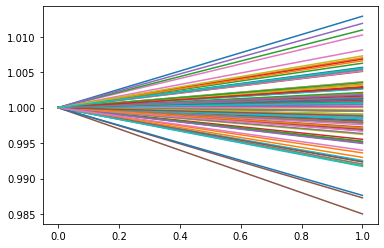

In [99]:
paper_vol = 8.3 * 10**(-4) / np.sqrt(24)
paper_vol = 0.0005
print(paper_vol)
print(0.996)
n_steps = 1
bs_test = library.market_modelsM.bs_stock(1,0,vol=paper_vol,n_steps = n_steps)
from matplotlib import pyplot as plt
#bs_test = my_simulator.m.stock
for i in range(100):
    prices = [1]
    for t in range(n_steps):
        prices.append(bs_test.generate_price(1/n_steps))
    plt.plot(range(n_steps + 1),prices)
    bs_test.reset()
        

In [96]:
print(1-(1-0.999)*10)

0.99


## Testing Real Data

In [4]:
# External Packages
import numpy as np

# Internal Library
from library.market_modelsM import market, bs_stock, signal_stock, real_stock
from library.agents.distAgentsWIP3 import QRAgent, C51Agent
from library.agents.baseAgents import TWAPAgent
#from library.agents.distAgents import C51Agent
import library.simulations
import pandas as pd

# Define setup
params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 10,
    "batch_size" : 32,
    "action_values" : [0.05,0.075,0.09,0.1,0.11,0.15,0.2] #[0.05,0.075,0.1,0.15,0.2] 
}
state_size = 2
action_size = len(params["action_values"])
n_hist_prices = 32

# Define Agents
quentin = library.agents.distAgentsWIP3.QRAgent(state_size, params["action_values"], "Quentin",C=100, alternative_target = True,UCB=True,UCBc = 100,tree_horizon = 4,market_data_size=n_hist_prices)
brian = library.agents.distAgentsWIP3.C51Agent(state_size, params["action_values"], "Brian Appl 1hr md32",C=100, alternative_target = True,UCB=True,UCBc = 100,tree_horizon = 4,market_data_size=n_hist_prices)
tim = library.agents.baseAgents.TWAPAgent(3,"TWAP_APPL", len(params["action_values"]))
#print(brian.model.summary())
agents = [
    quentin
]
quentin.learning_rate = 0.0005
quentin.reward_scaling = True
# NOTE: Cosine basis for Isabelle results in a lot of params...

# Initialise Simulator
# BS market
'''
simple_stock = bs_stock(1,0,0.0005) # No drift, 0.0005 vol
simple_market = market(simple_stock,num_strats = len(agents))
my_simulator = library.simulations.simulator(simple_market,agents,params,test_name = "QR Testing")
'''

# real stock testing
# Retrieve data
'''
df1 = pd.read_csv("data/2020-05-04SPX_yFinance",low_memory = False) # Load .csv
df1 = df1["Adj Close.3"][2:]
df2 = pd.read_csv("data/2020-05-16SPX_yFinance",low_memory = False) # Load .csv
df2 = df2["Adj Close.3"][2:]
df3 = pd.read_csv("data/2020-05-22SPX_yFinance",low_memory = False) # Load .csv
df3 = df3["Adj Close.3"][2:]
df4 = pd.read_csv("data/2020-05-28SPX_yFinance",low_memory = False) # Load .csv
df4 = df4["Adj Close.3"][2:]
'''
df = pd.read_csv("data/EURUSD-2019-01C.csv",low_memory = False) # Load .csv

#appl_data = pd.concat([df1,df2,df3,df4])
print("Warning: dropping",sum(pd.isnull(appl_data)), "nan value(s)")
appl_data = appl_data.dropna()
appl_data = appl_data.values # Extract APPL as np array
print("Using",len(appl_data),"values")
appl_data = appl_data.astype(float) # convert any rogue strings to floats
appl_stock = real_stock(appl_data,n_steps = 60,recycle = True,n_train=10) # create stock - traded once per 6 minutes and recycled
appl_market = market(appl_stock,n_hist_prices = n_hist_prices)
my_simulator = library.simulations.simulator(appl_market,agents,params,test_name = "Apple Stock Testing")
my_simulator.train(20000)

# Signal market
'''
signal_stock = signal_stock(1,0.0005,0.0005,0.0005) # initial 1, vol 0.0005, signal vol 0.0005, signal reversion 0.0005
signal_market = market(signal_stock,num_strats = len(agents))
signal_simulator = library.simulations.simulator(signal_market,agents,params,test_name = "Signal Testing 1")
'''

KeyboardInterrupt: 

### Set up the agents and Simulator

## EURUSD

In [33]:
# External Packages
import numpy as np

# Internal Library
from library.market_modelsM import market, bs_stock, signal_stock, real_stock
from library.agents.distAgentsWIP2 import QRAgent, C51Agent
from library.agents.baseAgents import TWAPAgent
#from library.agents.distAgents import C51Agent
import library.simulations
import pandas as pd

# Define setup
params = {
    "terminal" : 1,
    "num_trades" : 600,
    "position" : 10,
    "batch_size" : 32,
    "action_values" : [0.5,0.98,0.99,0.998,1.0,1.002,1.01,1.02,1.5] #[0.05,0.075,0.09,0.1,0.11,0.15,0.2] #[0.05,0.075,0.1,0.15,0.2] 
}

state_size = 2
action_size = len(params["action_values"])
n_hist_prices = 32

# Define Agents
quentin = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "Quentin tr600",C=100, alternative_target = True,UCB=True,UCBc = 250,tree_horizon = 40,market_data_size=n_hist_prices)
#brian = library.agents.distAgentsWIP3.C51Agent(state_size, params["action_values"], "Brian Appl 1hr md32",C=100, alternative_target = True,UCB=True,UCBc = 100,tree_horizon = 4,market_data_size=n_hist_prices)
tim = library.agents.baseAgents.TWAPAgent(params["action_values"].index(1.0),"TWAP_EURUSD tr600", len(params["action_values"]))
#print(brian.model.summary())
agents = [
    quentin
]
quentin.learning_rate = 0.000025
quentin.reward_scaling = True
quentin.epsilon_min = 0.05

# NOTE: Cosine basis for Isabelle results in a lot of params...

# Initialise Simulator
# BS market

df = pd.read_csv("data/EURUSD-2019-01C.csv",low_memory = False, names=["Instrument", "Time", "Bid", "Ask"]) # Load .csv
df = df["Bid"]

# Instead use the processed by the second data
df = df_cut

#print("Warning: dropping",sum(pd.isnull(df)), "nan value(s)")

#appl_data = appl_data.dropna()
appl_data = df.values # Extract APPL as np array
print(appl_data[:10])
print("Using",len(appl_data),"values")
appl_data = appl_data.astype(float) # convert any rogue strings to floats
appl_stock = real_stock(appl_data,n_steps = params["num_trades"],recycle = True,n_train=1000) # create stock - traded once per 6 minutes and recycled
appl_market = market(appl_stock,n_hist_prices = n_hist_prices)
### Micro intervals ###
# Assume we are executing over 10s intervals, k should therefore be 600 times smaller (both vol and time / 600 but vol appears twice)

# Now executing over 40s intervals
appl_market.k /= 60
my_simulator = library.simulations.simulator(appl_market,agents,params,test_name = "EURUSD Testing by second")
my_simulator.train(30000)

# Signal market
'''
signal_stock = signal_stock(1,0.0005,0.0005,0.0005) # initial 1, vol 0.0005, signal vol 0.0005, signal reversion 0.0005
signal_market = market(signal_stock,num_strats = len(agents))
signal_simulator = library.simulations.simulator(signal_market,agents,params,test_name = "Signal Testing 1")
'''

[[1.14775]
 [1.14771]
 [1.14772]
 [1.14775]
 [1.14776]
 [1.14776]
 [1.1478 ]
 [1.1478 ]
 [1.14779]
 [1.14779]]
Using 1512000 values


wandb: Wandb version 0.9.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
requests_with_retry encountered retryable exception: ('Connection aborted.', OSError("(60, 'ETIMEDOUT')")). args: ('https://api.wandb.ai/files/tobyg/OptEx/2nxttbb3/file_stream',), kwargs: {'json': {'files': {'wandb-events.jsonl': {'offset': 25, 'content': ['{"system.cpu": 29.96, "system.memory": 68.36, "system.disk": 52.4, "system.proc.memory.availableMB": 2591.98, "system.proc.memory.rssMB": 198.1, "system.proc.memory.percent": 2.42, "system.proc.cpu.threads": 37.0, "system.network.sent": 5578752, "system.network.recv": 10795008, "_wandb": true, "_timestamp": 1592832043, "_runtime": 802}\n']}}}}
requests_with_retry encountered retryable exception: ('Connection aborted.', OSError("(60, 'ETIMEDOUT')")). args: ('https://api.wandb.ai/files/tobyg/OptEx/2nxttbb3/file_stream',), kwargs: {'json': {'complete': False, 'failed': False}}
requests_with_retry encountered retryable exception: HTTP

KeyboardInterrupt: 

In [5]:
my_simulator.train(30000)

wandb: Wandb version 0.9.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [ ]:
quentin.stock_model.get_weights()

Get data

In [13]:
import pandas as pd
#df = pd.read_csv("data/2019_05_19BTX_O.csv",low_memory = False) # Load .csv EURUSD-2019-01C.csv
df = pd.read_csv("data/EURUSD-2019-01C.csv",low_memory = False) # Load .csv EURUSD-2019-01C.csv
#df.columns = ["index","time","bid","bidSize","ask","askSize"]
df.columns = ["inst","time","bid","ask"]
df.head()
#diff = df["Time"][1] - df["Time"][0] 


,inst,time,bid,ask
0,EUR/USD,20190101 22:06:12.634,1.14567,1.14707
1,EUR/USD,20190101 22:06:13.091,1.14507,1.14647
2,EUR/USD,20190101 22:06:20.566,1.14574,1.14713
3,EUR/USD,20190101 22:06:20.573,1.14589,1.14730
4,EUR/USD,20190101 22:06:23.165,1.14574,1.14714


Change index to the time and group data by the second

In [14]:
from datetime import datetime
import numpy as np
#print(df["Time"][0])
#print(datetime.strptime('20190101 22:06:11','%Y%m%d %H:%M:%S'))
df["time"] =  pd.to_datetime(df['time'], format='%Y%m%d %H:%M:%S.%f')
#print(df["Time"][:50]-df["Time"][:50].shift(1))

#df["fTime"] = df["Time"].dt.strftime('%H:%M:%S')
#df["Day"] = df["Time"].dt.strftime('%d')
df = df.set_index("time")
# Try translating dataset to by the half second between 6am and 8pm
print(df.head())
grouped = df.groupby([pd.Grouper(freq='15S')])
result = grouped.last()
# Need to add a count here eventually

                            inst      bid      ask
time                                              
2019-01-01 22:06:12.634  EUR/USD  1.14567  1.14707
2019-01-01 22:06:13.091  EUR/USD  1.14507  1.14647
2019-01-01 22:06:20.566  EUR/USD  1.14574  1.14713
2019-01-01 22:06:20.573  EUR/USD  1.14589  1.14730
2019-01-01 22:06:23.165  EUR/USD  1.14574  1.14714


In [15]:
# Replace all NA values with the previous price
result = result.fillna(method='ffill')
print(result[:10])

                        inst      bid      ask
time                                          
2019-01-01 22:06:00  EUR/USD  1.14507  1.14647
2019-01-01 22:06:15  EUR/USD  1.14576  1.14716
2019-01-01 22:06:30  EUR/USD  1.14584  1.14691
2019-01-01 22:06:45  EUR/USD  1.14593  1.14733
2019-01-01 22:07:00  EUR/USD  1.14590  1.14730
2019-01-01 22:07:15  EUR/USD  1.14584  1.14706
2019-01-01 22:07:30  EUR/USD  1.14584  1.14706
2019-01-01 22:07:45  EUR/USD  1.14584  1.14706
2019-01-01 22:08:00  EUR/USD  1.14584  1.14706
2019-01-01 22:08:15  EUR/USD  1.14584  1.14706


In [16]:
df_cut = result[['bid']]


In [21]:
df_cut = df_cut[df_cut.index.dayofweek<=5] # Remove weekends

In [22]:
# Cut out of hours (In this case before 6am and after 8pm)
#df_cut = result.loc[pd.to_numeric(result.index.strftime('%H')) > 5] 
#df_cut = df_cut.loc[pd.to_numeric(df_cut.index.strftime('%H')) < 20] 
#print(pd.to_numeric(df["Time"].dt.strftime('%H'))[:10])
# Cut extrenous columns
#df_cut = df_cut[['bid']]
#df_cut = result[['bid']]

# Aggregate by the second retaining number of price updates and the last updated price
#proc_prices = (df_cut.groupby(['Day','fTime']).agg([('count','count'),('bid','last')]).reset_index())
#df_cut = df_cut.set_index(['Day','fTime'])

print(df_cut[:10])
df_cut.to_csv(f"cluster_data/cluster_EURUSD_15s_Feb.csv")

# proc_prices = proc_prices.set_index(['Day','fTime'])

                         bid
time                        
2019-01-01 22:06:00  1.14507
2019-01-01 22:06:15  1.14576
2019-01-01 22:06:30  1.14584
2019-01-01 22:06:45  1.14593
2019-01-01 22:07:00  1.14590
2019-01-01 22:07:15  1.14584
2019-01-01 22:07:30  1.14584
2019-01-01 22:07:45  1.14584
2019-01-01 22:08:00  1.14584
2019-01-01 22:08:15  1.14584


In [24]:
# Note we have discontinuities at the cut off points which will make it harder for the agent
period_len = 200
print("period in hrs",period_len/4)
print("number of eps",len(df_cut["bid"]) / period_len)

period in hrs 50.0
number of eps 866.28


## Test EURUSD Agent

In [1]:
import pandas as pd
merged = pd.read_csv("cluster_data/cluster_EURUSD_15s_Feb.csv",index_col = "time",low_memory = False)
#merged = merged.values
from imp import reload
import library.agents.distAgentsWIP2, library.simulations2, library.agents.baseAgents, library.market_modelsM
reload(library.agents.distAgentsWIP2)
reload(library.simulations2)
reload(library.market_modelsM)

n_hist_data = 32

params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 1,
    "batch_size" : 64,
    "action_values" : [0.9,0.96,0.98,0.99,1,1.01,1.02,1.04,1.1]
}
state_size = 2
harry = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "TEST QRDQN FX",C=50, N=200,alternative_target = True,UCB=True,UCBc = 100,tree_horizon = 4,n_hist_data=n_hist_data,n_hist_inputs=1,orderbook =False)
tim = library.agents.baseAgents.TWAPAgent(1,"10T200 TWAP",11)
agent = harry

agent.learning_rate = 0.000025

stock = library.market_modelsM.real_stock(merged,n_steps=10,n_train=50)
market = library.market_modelsM.market(stock,n_hist_data)
market.k = 0.004
market.b = 0.00004

my_simulator = library.simulations2.simulator(market,agent,params,test_name = "MO FX Testing",orderbook = False)
my_simulator.train(70000,epsilon_decay =0.9999)

Using TensorFlow backend.


trade freq 1


wandb: Wandb version 0.9.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


KeyboardInterrupt: 

In [2]:
harry.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 1)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 29, 16)       80          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 26, 16)       1040        conv1d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 416)          0           conv1d_2[0][0]                   
____________________________________________________________________________________________

In [12]:
my_simulator.episode(verbose = True,evaluate = True)

Predict [[-183407.06 -183407.12 -183407.19 -183407.16 -183407.16 -183407.16
  -183407.19 -183407.17 -183407.19]]
State:  [array([[ 1., -1.]]), array([[[-1.57287662],
        [-1.36315973],
        [-1.39811255],
        [-1.18839567],
        [-1.43306536],
        [-1.43306536],
        [-1.29325411],
        [-1.39811255],
        [-1.39811255],
        [-1.25830129],
        [-1.22334848],
        [-1.18839567],
        [-1.22334848],
        [-1.04858441],
        [-1.04858441],
        [-0.69905627],
        [-1.0136316 ],
        [-0.69905627],
        [-0.87382034],
        [-0.80391472],
        [-0.62915065],
        [-0.48933939],
        [-0.48933939],
        [-0.48933939],
        [-0.52429221],
        [-0.52429221],
        [-0.66410346],
        [-0.41943376],
        [-0.52429221],
        [-0.13981125],
        [ 0.17476407],
        [ 0.        ]]])] Action:  8 Reward:  0.10951151661695531 Next State:  [array([[ 0.78, -0.8 ]]), array([[[-0.62915065],
        [-0.4893

Predict [[-118830.81  -118830.85  -118830.836 -118830.836 -118830.836 -118830.836
  -118830.85  -118830.9   -118830.89 ]]
State:  [array([[-0.76,  0.6 ]]), array([[[0.90877316],
        [1.04858441],
        [0.97867878],
        [1.18839567],
        [1.08353722],
        [1.43306536],
        [1.50297099],
        [1.7825935 ],
        [1.64278224],
        [1.71268787],
        [1.88745194],
        [1.74764069],
        [1.74764069],
        [1.46801818],
        [1.46801818],
        [1.39811255],
        [1.57287662],
        [1.46801818],
        [1.36315973],
        [1.46801818],
        [1.85249913],
        [2.16707445],
        [1.7825935 ],
        [1.71268787],
        [1.64278224],
        [1.57287662],
        [1.57287662],
        [1.71268787],
        [1.92240475],
        [1.88745194],
        [1.50297099],
        [1.25830129]]])] Action:  8 Reward:  0.10953792159067706 Next State:  [array([[-0.98,  0.8 ]]), array([[[1.85249913],
        [2.16707445],
        [1.782

{}

## BTX data

In [1]:
import pandas as pd
df = pd.read_csv("data/2019_05_19BTX_O.csv",low_memory = False) # Load .csv
df.columns = ["index","time","bid","bidSize","ask","askSize"]
df_trades = pd.read_csv("data/2019_05_19BTX_TF.csv",low_memory = False) # Load .csv
print(df.head(20))
print(df_trades.head(20))


    index                       time     bid  bidSize     ask   askSize
0       0  0 days 00:00:05.727000000  7258.5  68371.0  7259.0  485885.0
1       1  0 days 00:00:05.759000000  7258.5  68371.0  7259.0  484842.0
2       2  0 days 00:00:05.764000000  7258.5  68371.0  7259.0  483894.0
3       3  0 days 00:00:05.769000000  7258.5  68371.0  7259.0  484864.0
4       4  0 days 00:00:05.796000000  7258.5  68371.0  7259.0  479864.0
5       5  0 days 00:00:05.797000000  7258.5  68371.0  7259.0  469864.0
6       6  0 days 00:00:05.798000000  7258.5  68371.0  7259.0  463864.0
7       7  0 days 00:00:05.800000000  7258.5  68371.0  7259.0  457864.0
8       8  0 days 00:00:05.805000000  7258.5  68371.0  7259.0  447864.0
9       9  0 days 00:00:05.832000000  7258.5  68371.0  7259.0  447281.0
10     10  0 days 00:00:05.887000000  7258.5  68371.0  7259.0  437281.0
11     11  0 days 00:00:05.888000000  7258.5  18371.0  7259.0  487281.0
12     12  0 days 00:00:05.899000000  7257.5  11812.0  7259.0  4

In [2]:
#df = df[396369:396430]
#df_trades = df_trades[121812:121850]
#print(df)

Trim, rename cols and remove duplicate rows

In [3]:
df = df[["time","bid","bidSize","ask","askSize"]]
df_trades.columns = ["index","time","side","size","price"]
df_trades = df_trades[["time","side","size","price"]]
df = df.drop_duplicates()
#df_trades = df_trades.drop_duplicates()
print(df.head())
print(df_trades.head())

                        time     bid  bidSize     ask   askSize
0  0 days 00:00:05.727000000  7258.5  68371.0  7259.0  485885.0
1  0 days 00:00:05.759000000  7258.5  68371.0  7259.0  484842.0
2  0 days 00:00:05.764000000  7258.5  68371.0  7259.0  483894.0
3  0 days 00:00:05.769000000  7258.5  68371.0  7259.0  484864.0
4  0 days 00:00:05.796000000  7258.5  68371.0  7259.0  479864.0
                        time     side     size   price
0  0 days 00:00:05.888000000  b'Sell'  15945.0  7258.5
1  0 days 00:00:05.899000000  b'Sell'    238.0  7257.5
2  0 days 00:00:05.899000000  b'Sell'    238.0  7257.5
3  0 days 00:00:05.899000000  b'Sell'    238.0  7257.5
4  0 days 00:00:05.899000000  b'Sell'    238.0  7257.5


Reformat times and reindex

In [4]:
df["time"] = pd.to_datetime(df['time'], format='0 days %H:%M:%S.%f')
df_trades["time"] = pd.to_datetime(df_trades['time'], format='0 days %H:%M:%S.%f')
df = df.set_index("time")
df_trades = df_trades.set_index("time")
print(df.head())
print(df_trades.head())

                            bid  bidSize     ask   askSize
time                                                      
1900-01-01 00:00:05.727  7258.5  68371.0  7259.0  485885.0
1900-01-01 00:00:05.759  7258.5  68371.0  7259.0  484842.0
1900-01-01 00:00:05.764  7258.5  68371.0  7259.0  483894.0
1900-01-01 00:00:05.769  7258.5  68371.0  7259.0  484864.0
1900-01-01 00:00:05.796  7258.5  68371.0  7259.0  479864.0
                            side     size   price
time                                             
1900-01-01 00:00:05.888  b'Sell'  15945.0  7258.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5


In [5]:
print(df_trades[:30])

                            side     size   price
time                                             
1900-01-01 00:00:05.888  b'Sell'  15945.0  7258.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:06.478  b'Sell'   1915.0  7257.5
1900-01-01 00:00:06.762  b'Sell'   7400.0  7257.5
1900-01-01 00:00:06.868  b'Sell'     50.0  7257.5
1900-01-01 00:00:06.894   b'Buy'     30.0  7258.0
1900-01-01 00:00:06.894   b'Buy'     30.0  7258.0
1900-01-01 00:00:06.894   b'Buy'     30.0  7258.0
1900-01-01 00:00:06.952  b'Sell'    500.0  7257.5
1900-01-01 00:00:06.952  b'Sell'    500.0  7257.5
1900-01-01 00:00:07.074   b'Buy'   1000.0  7257.5
1900-01-01 00:00:07.097   b'Buy'    304.0  7258.0


Group by the second

In [6]:
df_trades["side"] = df_trades["side"].astype(str)

#print(df_trades[df_trades["side"] == "b'Sell'"].head())

In [7]:
df_trades["side"] = df_trades["side"].astype(str)
#df_trades_B = df_trades[df_trades["side"] == "b'Buy'"]
grouped = df.groupby([pd.Grouper(freq='15S')])
result = grouped.last()
grouped_t = df_trades.groupby([pd.Grouper(freq='15S'),"side"])
result_t = grouped_t.sum()
result_t = result_t.unstack("side")
print(df.head())
print(df_trades.head())
print(result.head())
print(result_t.head())

                            bid  bidSize     ask   askSize
time                                                      
1900-01-01 00:00:05.727  7258.5  68371.0  7259.0  485885.0
1900-01-01 00:00:05.759  7258.5  68371.0  7259.0  484842.0
1900-01-01 00:00:05.764  7258.5  68371.0  7259.0  483894.0
1900-01-01 00:00:05.769  7258.5  68371.0  7259.0  484864.0
1900-01-01 00:00:05.796  7258.5  68371.0  7259.0  479864.0
                            side     size   price
time                                             
1900-01-01 00:00:05.888  b'Sell'  15945.0  7258.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
1900-01-01 00:00:05.899  b'Sell'    238.0  7257.5
                        bid   bidSize     ask    askSize
time                                                    
1900-01-01 00:00:00  7255.0   14392.0  7255.5   474703.0
1900-01-01 00:00:15  7251.0  412077.0  7251.5   665739.0
1900-01-0

In [8]:
#print(result.head())
#result = result.shift(1)
#print(result.head())

In [9]:
result = result.fillna(method='ffill')
result_t = result_t.fillna(method='ffill')
print(result.head())
print(result_t.head())

                        bid   bidSize     ask    askSize
time                                                    
1900-01-01 00:00:00  7255.0   14392.0  7255.5   474703.0
1900-01-01 00:00:15  7251.0  412077.0  7251.5   665739.0
1900-01-01 00:00:30  7246.0     640.0  7246.5   684735.0
1900-01-01 00:00:45  7263.5   51137.0  7264.0    13058.0
1900-01-01 00:01:00  7262.5   78802.0  7263.0  1006739.0
                         size               price          
side                   b'Buy'   b'Sell'    b'Buy'   b'Sell'
time                                                       
1900-01-01 00:00:00   21024.0   88248.0  130627.0  326526.5
1900-01-01 00:00:15   85790.0  229249.0  174079.0  725186.0
1900-01-01 00:00:30   37898.0  794202.0  246480.0  942386.0
1900-01-01 00:00:45  354615.0  229044.0  333582.5  289847.5
1900-01-01 00:01:00  316269.0  164057.0  450386.5  508441.0


Merge the two dataframes

In [10]:
# Get rid of price from trades
result_t_S = result_t[["size"]]
result_t_S.columns = ["buyMO","sellMO"]
print(result_t_S.head())
merged = pd.concat([result,result_t_S],axis=1,join="inner")
#result.merge(result_t_S, how = "left")
merged.columns = ["bid","bidSize","ask","askSize","buyMO","sellMO"]
merged["buySellImb"] = merged["buyMO"] - merged["sellMO"]
merged["orderImb"] = merged["bidSize"] - merged["askSize"]
merged["spread"] = merged["ask"] - merged["bid"]
print(merged.head())


                        buyMO    sellMO
time                                   
1900-01-01 00:00:00   21024.0   88248.0
1900-01-01 00:00:15   85790.0  229249.0
1900-01-01 00:00:30   37898.0  794202.0
1900-01-01 00:00:45  354615.0  229044.0
1900-01-01 00:01:00  316269.0  164057.0
                        bid   bidSize     ask    askSize     buyMO    sellMO  \
time                                                                           
1900-01-01 00:00:00  7255.0   14392.0  7255.5   474703.0   21024.0   88248.0   
1900-01-01 00:00:15  7251.0  412077.0  7251.5   665739.0   85790.0  229249.0   
1900-01-01 00:00:30  7246.0     640.0  7246.5   684735.0   37898.0  794202.0   
1900-01-01 00:00:45  7263.5   51137.0  7264.0    13058.0  354615.0  229044.0   
1900-01-01 00:01:00  7262.5   78802.0  7263.0  1006739.0  316269.0  164057.0   

                     buySellImb  orderImb  spread  
time                                               
1900-01-01 00:00:00    -67224.0 -460311.0     0.5  
190

Convert order sizes to ints

In [11]:
cols = ['bidSize','askSize','buyMO','sellMO','buySellImb','orderImb']
merged[cols] = merged[cols].astype(int)
merged.head()

,bid,bidSize,ask,askSize,buyMO,sellMO,buySellImb,orderImb,spread
time,,,,,,,,,
1900-01-01 00:00:00,7255.0,14392,7255.5,474703,21024,88248,-67224,-460311,0.5
1900-01-01 00:00:15,7251.0,412077,7251.5,665739,85790,229249,-143459,-253662,0.5
1900-01-01 00:00:30,7246.0,640,7246.5,684735,37898,794202,-756304,-684095,0.5
1900-01-01 00:00:45,7263.5,51137,7264.0,13058,354615,229044,125571,38079,0.5
1900-01-01 00:01:00,7262.5,78802,7263.0,1006739,316269,164057,152212,-927937,0.5


Export processed data for the cluster

In [12]:
day = 19
merged.to_csv(f"cluster_data/cluster_BTX_15s_{day}.csv")
print(len(merged),"data points")

5586 data points


In [1]:
import pandas as pd
merged = pd.read_csv("cluster_data/cluster_BTX_15s_19.csv",index_col = "time",low_memory = False)

                        bid  bidSize     ask  askSize   buyMO  sellMO  \
time                                                                    
1900-01-01 00:00:00  7255.0    14392  7255.5   474703   21024   88248   
1900-01-01 00:00:15  7251.0   412077  7251.5   665739   85790  229249   
1900-01-01 00:00:30  7246.0      640  7246.5   684735   37898  794202   
1900-01-01 00:00:45  7263.5    51137  7264.0    13058  354615  229044   
1900-01-01 00:01:00  7262.5    78802  7263.0  1006739  316269  164057   

                     buySellImb  orderImb  spread  
time                                               
1900-01-01 00:00:00      -67224   -460311     0.5  
1900-01-01 00:00:15     -143459   -253662     0.5  
1900-01-01 00:00:30     -756304   -684095     0.5  
1900-01-01 00:00:45      125571     38079     0.5  
1900-01-01 00:01:00      152212   -927937     0.5  


,bid,bidSize,ask,askSize,buyMO
time,,,,,
1900-01-01 00:00:06,7257.0,1888,7257.5,12164,90
1900-01-01 00:00:07,7256.0,26954,7257.5,164525,18680
1900-01-01 00:00:08,7256.0,26954,7257.5,164525,0
1900-01-01 00:00:09,7256.0,26949,7256.5,91250,0
1900-01-01 00:00:10,7256.0,46404,7256.5,123848,0


### BTX Trading

In [63]:
import library.market_modelsM
from imp import reload
reload(library.market_modelsM)
stock = library.market_modelsM.real_stock_lob(merged,n_steps = 10)
market = library.market_modelsM.lob_market(stock,4)
import library.local_environments
reload(library.local_environments)
env = library.local_environments.orderbook_environment(market,10,10,[0,0.1])


LOs capped at 100000
trade freq 1


In [7]:
import numpy as np
test_states = market.state()
print(test_states)
new_state = test_states[0]
for state in test_states:
    if new_state is None:
        new_state = state
        continue
    new_state = np.vstack((new_state,state))

print(np.transpose(new_state).shape) #Time first then vector len    

(array([0.99765618, 0.9984062 , 0.99984375, 1.00053127, 1.00371887,
       1.00384387, 1.00215632, 0.99884371, 0.99859371, 0.99978124,
       0.99978124, 0.99759367, 0.9982812 , 0.99884371, 0.99928123,
       0.99996875]), array([0.99771868, 0.9984687 , 0.99990625, 1.00065627, 1.00378137,
       1.00390637, 1.00221882, 0.99934373, 0.99865621, 0.99984375,
       0.99984375, 0.9982812 , 0.9983437 , 0.99890622, 0.99934373,
       1.00003125]), array([  4072, 157482, 215850, 183638,     22,  58849, 131099,  12000,
       536261, 309753, 434931,   7967,  77489, 129032, 710177, 492222]), array([245181, 341365, 162019,  89986,  35042, 280772,  56137,   8956,
       142613, 300758, 329927,  91558,  76376, 332035,  58606, 438652]), array([ 0.48476013,  0.68098166,  0.93007322,  0.8567456 ,  0.97336374,
        0.81682565,  0.5521099 , -0.60427299, -0.5726334 ,  0.72231753,
        0.70184524, -0.83769395, -0.35857295,  0.84375892,  0.37950679,
        0.80464539]), array([ 0.98339186,  0.538669

In [33]:
env.reset()
print("ask",env.m.stock.ask,"askSize",env.m.stock.askSize,"pos",env.m.lo_position,"pos size",env.m.lo_size)

(array([1.00160413, 1.00091215, 1.00066052, 0.99996855]), array([1.00166703, 1.00097506, 1.00072343, 1.00003145]), array([504284, 214234,  56234,    550]), array([ 60252, 215615,   1476, 167230]), array([ 0.64501083, -0.12602933, -0.84524922,  0.25312212]), array([-0.88051971,  0.00640493, -0.97375253,  0.99671112]))
ask 1.000031453464599 askSize 550 pos [] pos size []


In [34]:
print(stock)
for i in range(10):
    env.sell([1,1])
    env.m.progress(0.1)
    print("ask",env.m.stock.ask,"askSize",env.m.stock.askSize,"pos",env.m.lo_position,"pos size",env.m.lo_size)

Real Stock, using 5586 data points, not recycling data points. Sampling over 10 steps.
ask 1.0005976158273835 askSize 4702 pos [550.] pos size [1.]
ask 1.0019186613405466 askSize 363302 pos [4702.] pos size [1.]
ask 1.0016041266945555 askSize 893808 pos [363302.] pos size [1.]
ask 1.0008492435441765 askSize 535149 pos [893808.] pos size [1.]
ask 1.0008492435441765 askSize 216971 pos [535149.] pos size [1.]
ask 1.0008492435441765 askSize 156370 pos [216971. 216972.] pos size [1. 1.]
ask 1.0008492435441765 askSize 671976 pos [106541. 106542.] pos size [1. 1.]
ask 1.0008492435441765 askSize 188813 pos [97204. 97205.] pos size [1. 1.]
ask 1.0008492435441765 askSize 639868 pos [76045. 76046.] pos size [1. 1.]
ask 1.0008492435441765 askSize 82428 pos [48491. 48492.] pos size [1. 1.]


In [35]:
#market.reset()
market.place_limit_order(4)
#market.progress(0.1)
#market.place_limit_order(3)


0

In [36]:
print(market.lo_position)

[48491. 48492. 82430.]


In [37]:
market.execute_lob()

(6.0, 6.005095461265059)

In [38]:
#import numpy as np
#from matplotlib import pyplot as plt
x = np.arange(11)
y = np.arange(11) * 10000
plt.bar(x,y,width = 0.8)


NameError: name 'np' is not defined

Export new dataset to csv for the cluster

### Now test the agent

In [3]:
import library.agents.distAgentsWIP2, library.simulations2, library.agents.baseAgents
reload(library.agents.distAgentsWIP2)
reload(library.simulations2)

params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 10000,
    "batch_size" : 32,
    "action_values" : [[0.5,5],[1,0],[2,0],
                       [0.25,2],[0.5,2],[1,1],
                       [0,0.5],[0,1],[0,2],
                       [1,4],[1,3]]
                        # [0.001,0.005,0.01,0.015,0.02,0.03,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35]
}
state_size = 3
harry = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "Overhaul Test Unit",C=100, alternative_target = True,UCB=True,UCBc = 100,tree_horizon = 3,n_hist_data=16,n_hist_inputs=7,orderbook =True)#,market_data_size=n_hist_prices)
tim = library.agents.baseAgents.TWAPAgent(1,"TWAP",11)
agent = harry

#agent.learning_rate = 0.00025

stock = library.market_modelsM.real_stock_lob(merged,n_steps=10,n_train=300)
market = library.market_modelsM.lob_market(stock,16)
market.k *= 10

my_simulator = library.simulations2.simulator(market,agent,params,test_name = "Hist Overhaul Testing",orderbook = True)
my_simulator.train(70000,epsilon_decay =0.9999)



Using TensorFlow backend.


LOs capped at 100000
trade freq 1


wandb: Wandb version 0.9.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
requests_with_retry encountered retryable exception: ('Connection aborted.', OSError("(50, 'ENETDOWN')")). args: ('https://api.wandb.ai/files/tobyg/OptEx/3kq955es/file_stream',), kwargs: {'json': {'files': {'wandb-history.jsonl': {'offset': 927, 'content': ['{"episode": 3800, "act_val0": 0.9934042692184448, "_runtime": 1768.7490429878235, "_timestamp": 1595074581.200923, "_step": 927}\n', '{"episode": 3800, "act_val1": 0.9918340444564819, "_runtime": 1768.7594780921936, "_timestamp": 1595074581.211358, "_step": 928}\n', '{"episode": 3800, "act_val2": 0.9912666082382202, "_runtime": 1768.76771402359, "_timestamp": 1595074581.219594, "_step": 929}\n', '{"episode": 3800, "act_val3": 0.9921389222145081, "_runtime": 1768.775442123413, "_timestamp": 1595074581.227322, "_step": 930}\n', '{"episode": 3800, "act_val4": 0.9921581149101257, "_runtime": 1768.7830719947815, "_timestamp": 15950745

KeyboardInterrupt: 

### Non LOB Agent with orderbook data

In [2]:
import pandas as pd
merged = pd.read_csv("cluster_data/cluster_BTX_15s_19.csv",index_col = "time",low_memory = False)

import library.agents.distAgentsWIP2, library.simulations2, library.agents.baseAgents, library.market_modelsM
from imp import reload
reload(library.agents.distAgentsWIP2)
reload(library.simulations2)
reload(library.market_modelsM)

params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 1,
    "batch_size" : 64,
    "action_values" : [[0.5,0],[0.6,0],[0.7,0],[0.8,0],[0.9,0],[1,0],[1.1,0],[1.2,0],[1.3,0],[1.4,0],[1.5,0]]
}
state_size = 3
harry = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "T QRDQN MD",C=50, alternative_target = True,UCB=True,UCBc = 150,tree_horizon = 4,n_hist_data=32,n_hist_inputs=7,orderbook =True)
tim = library.agents.baseAgents.TWAPAgent(1,"TWAP",11)
agent = harry

agent.learning_rate = 0.00005

stock = library.market_modelsM.real_stock_lob(merged,n_steps=10,n_train=300)
market = library.market_modelsM.lob_market(stock,32)
market.k = 0.02
market.b = 0.005

my_simulator = library.simulations2.simulator(market,agent,params,test_name = "MO MD Testing",orderbook = True)
my_simulator.train(70000,epsilon_decay =0.9999)

Using TensorFlow backend.


LOs capped at 100000
trade freq 1


KeyboardInterrupt: 

In [7]:
print(harry.model.summary())
harry.n_hist_data

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 28)           168         input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 28)           812         dense_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 28)           0           dense_1[0][0]                    
                                                                 dense_2[0][0]              

32

In [30]:
my_simulator.train(25000)

wandb: Wandb version 0.9.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor se

wandb: Network error (ConnectionError), entering retry loop. See /Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobyweston/Applications/a

wandb: Network error (ConnectionError), entering retry loop. See /Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobyweston/Applications/a

wandb: Network error (ConnectionError), entering retry loop. See /Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobyweston/Applications/a

wandb: Network error (ConnectionError), entering retry loop. See /Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobyweston/Applications/a

wandb: Network error (ConnectionError), entering retry loop. See /Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobyweston/Applications/a

wandb: Network error (ConnectionError), entering retry loop. See /Users/tobyweston/Documents/Imperial/Thesis/ThesisCode/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 57, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/tobyweston/Applications/anaconda3/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobyweston/Applications/a

SystemError: <built-in method __array__ of numpy.ndarray object at 0x134a92580> returned a result with an error set

Error in callback <function _init_jupyter.<locals>.cleanup at 0x13f995048> (for post_run_cell):


KeyboardInterrupt: 

In [ ]:
my_simulator.train(25000)

In [29]:
my_simulator.episode(verbose = True)

Agent 0 predict [[5.3083664e+08 5.3083389e+08 5.3082870e+08 5.3083702e+08 5.3083469e+08
  5.3083037e+08 5.3083744e+08 5.3083565e+08 5.3083222e+08]]
State[0]:  [[ 1.00000000e+00 -1.00000000e+00  9.99968690e-01  1.00003131e+00
   1.14931600e+06  9.84250000e+04  0.00000000e+00]] Actions[0]:  0 Rewards[0]:  0.049748434515795734 Next_states[0]:  [[ 9.00000000e-01 -8.00000000e-01  9.99968690e-01  1.00003131e+00
   1.16266100e+06  5.28180000e+04  0.00000000e+00]] Done[0]:  False
Agent 0 next predict [[5.1186320e+08 5.1186070e+08 5.1185536e+08 5.1186374e+08 5.1186166e+08
  5.1185728e+08 5.1186419e+08 5.1186246e+08 5.1185904e+08]]
Agent 0 predict [[5.1186320e+08 5.1186070e+08 5.1185536e+08 5.1186374e+08 5.1186166e+08
  5.1185728e+08 5.1186419e+08 5.1186246e+08 5.1185904e+08]]
State[0]:  [[ 9.00000000e-01 -8.00000000e-01  9.99968690e-01  1.00003131e+00
   1.16266100e+06  5.28180000e+04  0.00000000e+00]] Actions[0]:  2 Rewards[0]:  0.19601878581045118 Next_states[0]:  [[ 5.00000000e-01 -6.0000000

In [ ]:
# External Packages
import numpy as np

# Internal Library
from library.market_modelsM import market, bs_stock, signal_stock, real_stock
from library.agents.distAgentsWIP2 import QRAgent, C51Agent
from library.agents.baseAgents import TWAPAgent
from library.agents.valueAgents import DDQNAgent
#from library.agents.distAgents import C51Agent
import library.simulations
import pandas as pd


params = {
    "terminal" : 1,
    "num_trades" : 10,
    "position" : 10,
    "batch_size" : 32,
    "action_values" : [0.05,0.075,0.1,0.15,0.2] # [0.001,0.005,0.01,0.015,0.02,0.03,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35]
}
# Optimal action 0.1
state_size = 2
action_size = len(params["action_values"])

#fred = library.agents.DQNAgent(state_size, action_size,"Fred") # initialise agent
#greg = library.agents.DQNAgent(state_size, action_size,"Greg15",C=15) # Second agent
#greta = library.agents.DQNAgent(state_size, action_size,"Greta4",C=4,alternative_target = True) # Second agent

#alice = library.agents.DDQNAgent(state_size, action_size,"Alice")
#alice2 = library.agents.DDQNAgent(state_size, action_size,"Alice2")

#tim = library.agents.baseAgents.TWAPAgent(2,"Tim")
#rob = library.agents.randomAgent(4,"Rob",action_size = action_size)

#amanda = library.agents.DDQNAgent(state_size, action_size,"Amanda30",C=30) # Second agent
#agnes = library.agents.DDQNAgent(state_size, action_size,"Agnes10",C=10,alternative_target = True) # Second agent

#daisy8a = library.WIPAgentsv2.distAgent(action_size,"Daisy8 Alt",C=8,alternative_target = True)
#daisy8a2 = library.WIPAgentsv2.distAgent("Daisy8 Alt 2",C=8,alternative_target = True)
#amanda10a = library.agents.DDQNAgent(state_size, action_size,"Amanda50 Alt",C=50)
#amanda20 = library.agents.DDQNAgent(state_size, action_size,"Amanda20",C=20) 
#greta = library.agents.DQNAgent(state_size, action_size,"Greta4",C=4,alternative_target = True)
#paul8a = library.WIPAgentsv3.distAgentL("Paul",C=8,alternative_target = True)
#daisy100N51 = library.WIPAgentsv2.distAgent(action_size,"Daisy100 N51",N=51,C=100,alternative_target = False)
#daisy15aN21 = library.WIPAgentsv2.distAgent(action_size,"Daisy15 Alt N21",N=21,C=15,alternative_target = True)

#daisy15N11 = library.WIPAgentsv2.distAgent(action_size,"Daisy15 N11",N=11,C=15,alternative_target = False,UCB = False)

#daisy25aN31_geo10k = library.WIPAgentsv2.distAgent(action_size,"Daisy25 Alt N31",N=31,C=25,alternative_target = True)
#daisy25aN31_9995 = library.WIPAgentsv2.distAgent(action_size,"Daisy25 Alt N31",N=31,C=25,alternative_target = True)
#daisy25aN31_9999 = library.WIPAgentsv2.distAgent(action_size,"Daisy25 Alt N31",N=31,C=25,alternative_target = True)
#daisy25aN31_99995 = library.WIPAgentsv2.distAgent(action_size,"Daisy25 Alt N31",N=31,C=25,alternative_target = True)

#candidate1 = library.WIPAgentsv2.distAgent(action_size,"Daisy400a N31 UCB80 n4",N=31,C=400,alternative_target = True,UCB = True, UCBc = 80)
#candidate2 = library.WIPAgentsv2.distAgent(action_size,"Daisy150a N41 UCB100 n4",N=41,C=150,alternative_target = True,UCB = True,UCBc = 100)
#brian = library.agents.distAgentsWIP2.C51Agent(state_size, params["action_values"],"BrianOg100a N41 UCB100 n4",N=41,C=100,alternative_target = True,UCB = True,UCBc = 90)

quentin = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "Quentin No MD",C=100, alternative_target = True,UCB=True,UCBc = 200,tree_horizon = 3)#,market_data_size=n_hist_prices)
quentin_eps = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "Quentin No MD eps",C=100, alternative_target = True,UCB=False,UCBc = 0,tree_horizon = 3)#,market_data_size=n_hist_prices)
#amanda = library.agents.valueAgents.DDQNAgent(state_size, action_size,"Amanda200",C=200,alternative_target = True) 

agents = [
    quentin
]
quentin.learning_rate = 0.001

#amanda10a.tree_n = 4
#candidate1.tree_n = 5
#brian.tree_n = 4


#daisy8a2.epsilon_min = 0.1
#paul8a.epsilon_min = 0.04
#amanda10a.epsilon_min = 0.01
#alice.learning_rate = 0.01

simple_stock = bs_stock(1,0,0.0005) # No drift, 0.0005 vol
simple_market = market(simple_stock)

epsilon_decays = [0.99992,0.9995,0.9999,0.99995,1]

my_simulator = library.simulations.simulator(simple_market,agents,params,test_name = "Test 28")
#my_simulator.plot_title = "Test 20"
my_simulator.train(10000)


Using TensorFlow backend.


wandb: Wandb version 0.9.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


KeyboardInterrupt: 

In [3]:
print(quentin.predict([[0,0]]))
print(quentin.predict_quantiles([[0,0]],4,target = True))
print(quentin.predict_quantiles([[0,0]],0,target = False))

[[0.4858236  0.4854226  0.48502162 0.48421964 0.48341766]]
[[0.504161   0.49303353 0.4881711  0.4863795  0.48419216 0.4819001
  0.47893927 0.47543344 0.46721983]]
[[0.5063431  0.4952353  0.49020696 0.48772845 0.48581648 0.48335174
  0.4806112  0.47624958 0.46686953]]


In [2]:
# External Packages
import numpy as np

# Internal Library
from library.market_modelsM import market, bs_stock, signal_stock, real_stock
from library.agents.distAgentsWIP2 import QRAgent, C51Agent
from library.agents.baseAgents import TWAPAgent
#from library.agents.distAgents import C51Agent
import library.simulations
import pandas as pd

# Define setup
params = {
    "terminal" : 3600,
    "num_trades" : 10,
    "position" : 1,
    "batch_size" : 32,
    "action_values" : [0.05,0.075,0.09,0.1,0.11,0.15,0.2] #[0.05,0.075,0.1,0.15,0.2] 
}
state_size = 2
action_size = len(params["action_values"])
n_hist_prices = 0

# Define Agents
quentin = library.agents.distAgentsWIP2.QRAgent(state_size, params["action_values"], "Quentin",C=0, alternative_target = False,UCB=False,UCBc = 1,tree_horizon = 1,market_data_size=n_hist_prices)
#brian = library.agents.distAgentsWIP2.C51Agent(state_size, params["action_values"], "Brian Appl 1hr md32",C=150, alternative_target = True,UCB=False,UCBc = 0,tree_horizon = 4,market_data_size=n_hist_prices)
tim = library.agents.baseAgents.TWAPAgent(3,"TWAP_APPL", len(params["action_values"]))
#print(brian.model.summary())
agents = [
    quentin
]

brian.learning_rate = 0.0001
# NOTE: Cosine basis for Isabelle results in a lot of params...

# Initialise Simulator
# BS market
'''
simple_stock = bs_stock(1,0,0.0005) # No drift, 0.0005 vol
simple_market = market(simple_stock,num_strats = len(agents))
my_simulator = library.simulations.simulator(simple_market,agents,params,test_name = "QR Testing")
'''

# real stock testing
# Retrieve data

df1 = pd.read_csv("data/2020_05_04_SPX_yFinance") # Load .csv
df1 = df1["Adj Close.3"][2:]
df2 = pd.read_csv("data/2020_05_16_SPX_yFinance") # Load .csv
df2 = df2["Adj Close.3"][2:]
appl_data = pd.concat([df1,df2])
print("Warning: dropping",sum(pd.isnull(appl_data)), "nan value(s)")
appl_data = appl_data.dropna()
appl_data = appl_data.values # Extract APPL as np array
appl_data = appl_data.astype(float) # convert any rouge strings to floats
appl_stock = real_stock(appl_data,n_steps = params["terminal"],recycle = True,n_train=10) # create stock - traded once per 6 minutes and recycled
appl_market = market(appl_stock,num_strats = len(agents),n_hist_prices = n_hist_prices)
#my_simulator = library.simulations.simulator(appl_market,agents,params,test_name = "Apple Stock Testing")

simple_stock = bs_stock(1,0,0.0005) # No drift, 0.0005 vol
simple_market = market(simple_stock,num_strats = len(agents))
my_simulator = library.simulations.simulator(simple_market,agents,params,test_name = "Simple Stock Testing")

my_simulator.train(10000)


FileNotFoundError: [Errno 2] File b'data/2020_05_04_SPX_yFinance' does not exist: b'data/2020_05_04_SPX_yFinance'

In [2]:
print(my_simulator.possible_actions)

[0.05, 0.075, 0.09, 0.1, 0.11, 0.15, 0.2]


### Train agents

In [103]:
#my_simulator.pretrain(n_iterations = 1000)

In [3]:
#epsilon_decays = [0.9992,0.999,1,1]
my_simulator.train(epsilon_decay = epsilon_decays, n_episodes = 10000)

10.0
rate  10.0 price_adjust  0.9995001249791693
5.0
rate  5.0 price_adjust  0.9992502811797007
20.0
rate  20.0 price_adjust  0.9982515303571615
7.5
rate  7.5 price_adjust  0.9978772562140654
15.0
rate  15.0 price_adjust  0.9971291288547331
10.0
rate  10.0 price_adjust  0.996630688910676
20.0
rate  20.0 price_adjust  0.9956345563710461
10.0
rate  10.0 price_adjust  0.9951368635264404
2.5
rate  2.5 price_adjust  0.9950124791926824
10.0
rate  10.0 price_adjust  0.9995001249791693
20.0
rate  20.0 price_adjust  0.9985011244377109
15.0
rate  15.0 price_adjust  0.9977525293526299
5.0
rate  5.0 price_adjust  0.9975031223974602
5.0
rate  5.0 price_adjust  0.9972537777862359
15.0
rate  15.0 price_adjust  0.996506117860415
5.0
rate  5.0 price_adjust  0.9962570224691712
5.0
rate  5.0 price_adjust  0.9960079893439917
7.5
rate  7.5 price_adjust  0.9956345563710463
12.5
rate  12.5 price_adjust  0.9950124791926825
5.0
rate  5.0 price_adjust  0.999750031247396
20.0
rate  20.0 price_adjust  0.998750780

KeyboardInterrupt: 

In [3]:
my_simulator.train(epsilon_decay = epsilon_decays, n_episodes = 4000)

wandb: Wandb version 0.9.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


KeyboardInterrupt: 

### Additional Training

In [3]:
epsilons = [0.2,0.2,0.22,0.22,1]
#epsilon_decays = [0.999,0.999,1,1]
my_simulator.train(epsilon = epsilons, epsilon_decay = epsilon_decays, n_episodes = 4000)

wandb: Wandb version 0.9.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


KeyboardInterrupt: 

Add twap stat to final plot

In [97]:
from matplotlib import pyplot as plt
plt.ylim([9,10])
twap_stat = 9.849
plt.plot([0, 175], [twap_stat, twap_stat], 'k--')

[[0.9816368  0.98090005 0.98161376 0.9812872  0.98100924 0.9811677
  0.97668177 0.97239447 0.98232573 0.9828187  0.9835104  0.97631484
  0.9837178  0.9788152  0.98219454 0.97453266 0.97926164 0.9822097
  0.98293096 0.9816875  0.97793233 0.9805943  0.9793598  0.9798903
  0.98492324 0.9829585  0.98157275 0.98147964 0.9851757  0.97578686
  0.985867   0.9746696  0.9780312  0.98435265 0.9820378  0.9816322
  0.97689605 0.98393565 0.9802745  0.976427   0.9797272  0.9818812
  0.9770058  0.9784971  0.98447496 0.98525405 0.97938687 0.97533464
  0.98424476 0.9757514  0.9819727 ]]


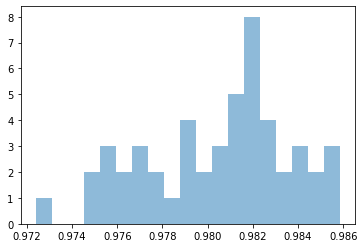

Error in callback <function _init_jupyter.<locals>.cleanup at 0x13b2668c8> (for post_run_cell):


AttributeError: 'JupyterAgent' object has no attribute 'rm'

In [24]:
from matplotlib import pyplot as plt
state = [[1,-1]]
actions = [5]
for action in actions:
    state_action = harry._process_state_action(state,action)
    quants = harry.predict_quantiles(state_action)
    print(quants)
    quants = quants[0][:len(quants[0])-1]
    #print(quants)
    plt.hist(quants,bins = 19,alpha=0.5)

In [2]:
import numpy as np
x = np.array([1,2,3])
np.add.reduce(x)

6

In [7]:
res = (19,20)
x,y,*z = res
print(x,y)

19 20


In [10]:
import pandas as pd
df1 = pd.read_csv("data/2020_05_04_SPX_yFinance") # Load .csv
df2 = pd.read_csv("data/2020_05_16_SPX_yFinance") # Load .csv
print(df1["Adj Close.3"].head())
print(df2["Adj Close.3"].head())

0                  AAPL
1                   NaN
2    288.79998779296875
3     288.2250061035156
4    288.07000732421875
Name: Adj Close.3, dtype: object
0                 AAPL
1                  NaN
2    312.8826904296875
3    312.2799987792969
4    311.7300109863281
Name: Adj Close.3, dtype: object


In [28]:
my_simulator_eval = library.simulations.simulator(appl_market,agents,params,test_name = "Apple Stock Testing")

wandb: Wandb version 0.9.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Evaluate a sample episode post training

In [29]:
print(quentin.epsilon)
actions = np.array([0])
my_simulator.episode(evaluate = 1,verbose = 1)
#david.predict[]


1
Agent 0 predict [[0.99768007 0.9976507  0.9976271  0.99762124 0.9976153  0.99759173
  0.9975623 ]]
State[0]:  [array([[ 1., -1.]]), array([[[-2.61278523e-05],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 4.35464205e-05],
        [ 5.22557046e-05],
        [ 5.22557046e-05],
        [ 5.22557046e-05],
        [ 4.35464205e-05],
        [ 5.22557046e-05],
        [ 5.22557046e-05],
        [ 2.61278523e-05],
        [ 5.22557046e-05],
        [ 5.22557046e-05],
        [ 4.35464205e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 0.00000000e+00]]])]

Agent 0 predict [[0.7284437  0.7284556  0.7284652  0.7284676  0.72847    0.7284794
  0.72849154]]
State[0]:  [array([[ 0.461, -0.45 ]]), array([[[ 5.22557046e-05],
        [ 5.22557046e-05],
        [ 4.35464205e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 0.00000000e+00],
        [-2.61278523e-05],
        [-1.48617149e-04],
        [-2.18848538e-04],
        [-3.41314228e-04],
        [-4.72469934e-04],
        [-5.60088752e-04],
        [-6.82512643e-04],
        [-8.04921537e-04],
        [-9.27315438e-04],
        [-1.07579341e-03],
        [-1.18075689e-03]]

Agent 0 next predict [[0.48388416 0.48392022 0.48394898 0.4839562  0.4839634  0.48399222
  0.48402822]]
Agent 0 predict [[0.48388416 0.48392022 0.48394898 0.4839562  0.4839634  0.48399222
  0.48402822]]
State[0]:  [array([[-0.029,  0.05 ]]), array([[[ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 6.09649887e-05],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 8.70928410e-06],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 1.74185682e-05],
        [ 0.00000000e+00],
        [-2.61278523e-05],
        [-1.48617149e-04],
        [-2.18848538e-04],
        [-3.41314228e-04],
        [-4.72469934e-04],
        [-5.60088752e-04],
        [-6.82512643e-04],
        [-8.04921537e-04],
        [-9.27315438e-04],
        [-1.07579341e-03],
        [-1.18075689e-03],
        [-1.32049986e-03],
        [-1.43413412e-03],
        [-1.55645094e-03],
        [-1.67875279e-03],
        [-1.80103965e-03],
        [-1.94069599e-03],
  

Agent 0 predict [[0.26378772 0.2638238  0.2638526  0.2638598  0.26386705 0.26389587
  0.2639319 ]]
State[0]:  [array([[-0.47,  0.5 ]]), array([[[ 1.74185682e-05],
        [ 0.00000000e+00],
        [-2.61278523e-05],
        [-1.48617149e-04],
        [-2.18848538e-04],
        [-3.41314228e-04],
        [-4.72469934e-04],
        [-5.60088752e-04],
        [-6.82512643e-04],
        [-8.04921537e-04],
        [-9.27315438e-04],
        [-1.07579341e-03],
        [-1.18075689e-03],
        [-1.32049986e-03],
        [-1.43413412e-03],
        [-1.55645094e-03],
        [-1.67875279e-03],
        [-1.80103965e-03],
        [-1.94069599e-03],
        [-2.03687727e-03],
        [-2.15912027e-03],
        [-2.27265925e-03],
        [-2.39487336e-03],
        [-2.51707251e-03],
        [-2.64794253e-03],
        [-2.76142589e-03],
        [-2.95304987e-03],
        [-3.07518064e-03],
        [-3.17993327e-03],
        [-3.28467520e-03],
        [-3.40676534e-03],
        [-3.53751894e-03]]]

### Plot Action value distributions for Distributional Agents

'\nprint(state,bar_agent.predict(state))\nprint(state1,bar_agent.predict(state1))\n#state = np.reshape(np.append(state,1), [1, 3])\n#print(state)\n#print(daisy.model.get_weights())\n#print("state probs", daisy.probs(state))\n#print("pred probs", bar_agent.model.predict(state1)[0])#-bar_agent.model.predict(state)[0])\nplt.legend()\nprint(bar_agent.probs(state,bar_act)[0])'

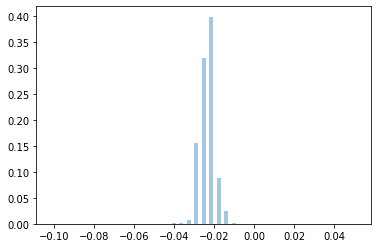

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 
bar_agent = brian #daisy15N11   daisy100N51
#plt.plot(my_simulator.eval_rewards_mean[:,1],label = "act " + str(1))
#print(my_simulator.eval_rewards_mean)
#print(my_simulator.env.reset())
#episode_actions = np.zeros((7,3))
#print(my_simulator.env.step([1,5,6,6]))
#state = my_simulator.env.reset()[0]
#print(my_simulator.env.cash)
loc = [1,-1]
md = np.ones(32)
loc = np.reshape(loc, [1, 2])
#md = np.reshape(md, [1, 32])
state = loc

bar_act = 3
#plt.bar(bar_agent.z,bar_agent.probs(state,bar_act)[0],alpha = 0.4,width = 0.002,label = f"state {state}, act {bar_act}")
bar_act = 4
plt.bar(bar_agent.z,bar_agent.probs(state,bar_act)[0],alpha = 0.4,width = 0.002,label = f"state {state}, act {bar_act}")


#plt.bar(bar_agent.z,bar_agent.probs(state1,bar_act)[0],alpha = 0.4,width = 0.004,label = f"state {state1}, act {bar_act}")
#plt.bar(bar_agent.z,bar_agent.probs(state2,bar_act)[0],alpha = 0.4,width = 0.004,label = f"state {state2}, act {bar_act}")
#print(bar_agent.probs(state))
#print(david30.predict(state))
'''
print(state,bar_agent.predict(state))
print(state1,bar_agent.predict(state1))
#state = np.reshape(np.append(state,1), [1, 3])
#print(state)
#print(daisy.model.get_weights())
#print("state probs", daisy.probs(state))
#print("pred probs", bar_agent.model.predict(state1)[0])#-bar_agent.model.predict(state)[0])
plt.legend()
print(bar_agent.probs(state,bar_act)[0])'''

<BarContainer object of 41 artists>

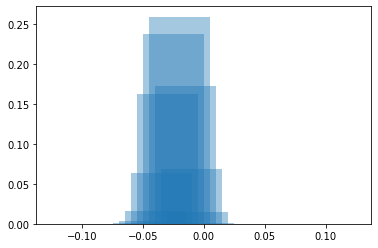

In [131]:
from matplotlib import pyplot
%matplotlib inline  
plt.bar(bar_agent.z,bar_agent.probs(state,bar_act)[0],alpha = 0.4,width = 0.05,label = f"act {bar_act}")

In [88]:
state = [-1,0] 
state = np.reshape(state, [1, 2])
print(brian.variance(state))
print(brian.var_act(state,3))
print(brian.probs(state,3,target = False))
print(brian.predict(state))

[[1.35744632e-05 5.86628584e-06 2.58160457e-06 5.99464104e-07
  4.74560938e-03]]
5.994723341004875e-07
[[5.5182400e-06 4.3750665e-09 7.5223115e-06 3.8480178e-07 4.1647644e-07
  3.4923675e-09 2.4237238e-06 1.4744355e-09 3.1187987e-08 1.6907694e-11
  5.8795553e-08 1.1792116e-06 5.0734457e-08 2.7221098e-10 4.8862375e-08
  2.0434729e-06 2.8074530e-06 3.4797912e-07 1.7652665e-10 1.5957380e-06
  9.9997032e-01 2.7648263e-12 3.7239647e-09 6.4975785e-09 1.3954185e-10
  3.4414436e-06 6.0194715e-14 1.8028203e-08 6.9937067e-10 3.7105539e-07
  6.1954063e-14 4.7340407e-09 8.1869040e-08 5.0627906e-09 1.4544144e-09
  1.3242059e-06 3.8975507e-08 3.0195644e-12 1.6127088e-12 4.0010316e-14
  1.1356373e-08]]
[[-7.82182970e-05 -3.30417275e-05 -1.41244373e-05 -2.86881338e-06
  -1.31347548e-02]]


### Plot Action value estimates for the first action over time
If using a TWAP agent then add the average to denote the optimal action value for action 5

In [4]:

print(my_simulator.eval_rewards_mean.shape)
twap_stat = np.mean(my_simulator.eval_rewards_mean[:,0])
plt.plot([0, len(my_simulator.train_actions[:,0])], [twap_stat, twap_stat], 'k--')

(21, 1)


NameError: name 'plt' is not defined

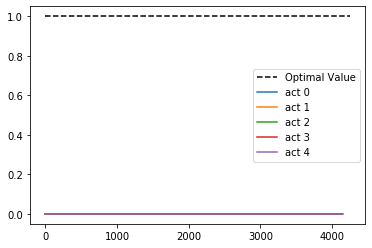

In [5]:

from matplotlib import pyplot as plt
strat = 0
plt.plot([0, len(my_simulator.train_actions[:,0])], [twap_stat, twap_stat], 'k--',label = "Optimal Value")
for i in range(5):
    plt.plot(my_simulator._moving_average(my_simulator.train_actions[:,i,strat],n=100),label = "act " + str(i))
    pass
#plt.ylim([0.96,1])
#plt.xlim([10000,12000])
plt.legend()
#plt.plot(moving_average(my_simulator.train_actions[:,0,strat],n=5),label = "act " + str(i))


### A look at state values

Text(0.5, 1.0, 'State values over position')

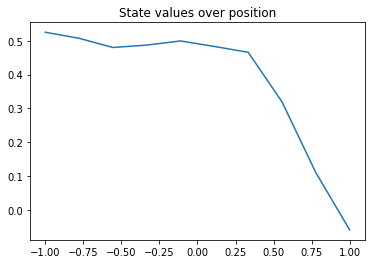

In [11]:
# First check value with position start with 2D
from matplotlib import pyplot as plt
bar_agent = quentin
n = 10
values = []
x_vals = []
my_action = 2
t = -1
p = 0


for i in range(n):
    #action_vals = []
    t = 2 * i / (n-1) - 1
    state = [p,t] 
    state = np.reshape(state, [1, 2])
    values.append(bar_agent.predict(state)[0][my_action])
    x_vals.append(t)
    
plt.plot(x_vals,values)
plt.title("State values over position")
    
    

### Investigating UCB Algo Addition

In [23]:
UCB_agent = quentin
print("Simulating Action")
#md = np.
state = [np.array([[1,-1]]),np.array([[[1]] * 32])]
#state = np.reshape(state, [1, 2])
state1 = [0,0] 
#state = np.reshape(state, [1, 2])
c=250
t= 15000

predictions = UCB_agent.predict(state)[0]
variance = UCB_agent.variance(state)
test_ct = c * np.sqrt(np.log(t) / t)
ucb_element = test_ct * np.sqrt(variance)
print("Predictions: ", predictions,"Variance: ", variance, "UCB element: ",ucb_element )
print("Argmax without UCB: ",np.argmax(predictions),"Argmax with UCB: ",np.argmax(predictions + ucb_element) )
#r1 = np.power(UCB_agent.predict_quantiles(state,4),2)
#print(UCB_agent.predict(state)[0][4])
#print(np.sum(r1)/3 - UCB_agent.predict(state)[0][4]**2)




Simulating Action
Predictions:  [0.9973101  0.9973226  0.99733555 0.9973479  0.9973602 ] Variance:  [1.630828336018908e-05, 1.613704688097073e-05, 1.5967720614185055e-05, 1.573529391052375e-05, 1.544295810163021e-05] UCB element:  [0.02556179 0.02542724 0.02529349 0.02510872 0.02487439]
Argmax without UCB:  4 Argmax with UCB:  0


In [5]:
# Try ramping up c
print(quentin.predict_quantiles(state,4))

[[ 0.80400574  0.85369796  0.8654276   0.8670649   0.9459648   0.94505507
   0.9601302   0.9747751   0.9633708   0.9896604   1.0108677   1.0192543
   1.0157591   1.0280389   1.0317265   1.0386562   1.0497516   1.0507549
   1.0539684   1.0679046   1.0632467   1.0762932   1.0890766   1.093793
   1.1001524   1.126096    1.1394058   1.1440622   1.1951554   1.2517793
  15.850747  ]]


## Misc Code

In [142]:
my_rands = np.random.rand(3)
#my_rands.shape = (1,3)
my_range = np.arange(2)
my_range.shape = (2,1)

np.cos(np.dot(my_range, my_rands) * np.pi)

ValueError: shapes (2,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

In [24]:
my_simulator.show_stats(moving_average = 800)

In [10]:
print(george.epsilon)
print(alice.epsilon)
state = [1,0.5] 
state = np.reshape(state, [1, 2])
print(alice.predict(state))


0.009993278292196676
0.00999727800350609
[[7612089.    716650.6   666954.56  679772.75  689112.    671250.25
   663567.6 ]]


In [16]:
state = [1,0.5] 
state = np.reshape(state, [1, 2])
pred1 = george.predict(state)
pred2 = pred1 + pred1
print(np.argmax(pred2))
print(pred2[0,np.argmax(pred2)])
print(pred2)

1
5.3915353
[[5.140569  5.3915353 4.5375085 4.7906394 3.8501995 3.0198317 1.5048974]]


In [28]:
plt.plot(moving_average(my_simulator.eval_rewards[:,1],n=300), label  = "George")

In [29]:
george.save("george1_t50_n7")

In [124]:
#print(my_simulator.code_time[:])
#plt.plot(moving_average(my_simulator.code_time[:,0]))
print(my_simulator.code_time_o.shape)
print("Outer 1: ", np.mean(my_simulator.code_time_o[:,0]))
print("Inner 1: ", np.mean(my_simulator.code_time_i[:,0]))
print("Inner 2: ", np.mean(my_simulator.code_time_i[:,1]))
print("Outer Inner : ", np.mean(my_simulator.code_time_o[:,1]))
print("Outer 2 : ", np.mean(my_simulator.code_time_o[:,2]))
#print(np.mean(plt.plot(my_simulator.code_time[:,2])))

(0, 3)
Outer 1:  nan
Inner 1:  nan
Inner 2:  nan
Outer Inner :  nan
Outer 2 :  nan


/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tobyweston/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [21]:
#my_simulator.show_training_stats()
#plt.plot(moving_average(my_simulator.all_rewards2,500))
plt.plot(moving_average(my_simulator.train_rewards[:,0],n=300), label  = "Fred")
plt.plot(moving_average(my_simulator.train_rewards[:,1],n=300), label  = "George")
plt.plot(moving_average(my_simulator.train_rewards[:,2],n=300), label  = "Tim")
plt.plot(moving_average(my_simulator.train_rewards[:,2],n=300), label  = "Tim")
plt.legend()
#len(my_simulator.all_rewards2)

In [25]:
plt.show()

6000

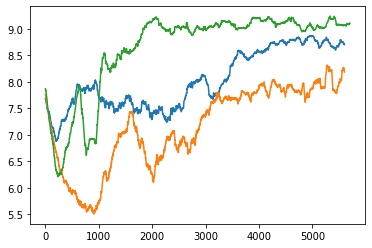

In [35]:
my_simulator.show_training_stats()
plt.plot(moving_average(my_simulator.all_rewards2,300))

len(my_simulator.all_rewards[:,0])




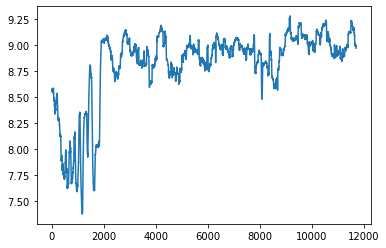

In [68]:
my_simulator.show_training_stats()

### Temporary Area for Simulator Code

**Todo:**
- Saving the agent model
- Evaluate agent

In [3]:
#from numpy import reshape
#from twap import agent_environment
#from matplotlib import pyplot as plt
#from numpy import cumsum
import time

class simulator:

    def __init__(self,market_,agents, params = None):
        
        # Default params
        if params is None:
            params = params = {"terminal" : 1, "num_trades" : 50, "position" : 10, "batch_size" : 32 }
            print("Initialising using default parameters")

        self.terminal = params["terminal"]
        self.num_steps = params["num_trades"]
        self.batch_size = params["batch_size"]
        self.agents = agents
        self.n_agents = len(self.agents)

        self.m = market_
        self.env = agent_environmentM(self.m,
                                     params["position"],
                                     params["num_trades"],
                                     params["terminal"],
                                     [0,0.001,0.005,0.01,0.02,0.05,0.1],
                                     self.n_agents
                                    )
        
        

        # Stats
        self.final_timestep = []
        self.train_rewards = np.zeros((0,self.n_agents))
        self.eval_rewards = np.zeros((0,self.n_agents))
        
        

    def __moving_average(self,a, n=300):
        ret = np.cumsum(a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n



    def train(self,n_episodes = 10000, epsilon = None, epsilon_decay = None,show_details = True, evaluate = False):
		# TODO: different training parameters
        
        # Number of agents to be trained
        
        ### Live Plots ###
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()

        fig.show()
        fig.canvas.draw()
        ### Live Plots ###
        
        # Default training parameters if not provided
        if epsilon is None:
            epsilon = [1] * self.n_agents
            
        if epsilon_decay is None:
            epsilon_decay = [0.998] * self.n_agents
        
        if evaluate:
            train = [False] * self.n_agents
        else:
            train = [True] * self.n_agents
            
        # TEMPORARY? #
        self.code_time_i = np.zeros((0,2))
        self.code_time_o = np.zeros((0,3))
        # TEMPORARY? #

        # Evaluatory Stats
        current_training_step = len(self.train_rewards) #
        
        n_correct = 0#
        total_reward = np.zeros(self.n_agents)#
        
        pcnt_opt = []#
        
        

		

		# Set up the agents:
        for i ,agent in enumerate(self.agents):
            agent.epsilon = epsilon[i]
            agent.epsilon_decay = epsilon_decay[i]
            
        # Setup action list
        actions = [-1] * self.n_agents
        
        timer_o = []
        
        for e in range(n_episodes): # iterate over new episodes of the game
            
            #Time code
            timer = []
            timer_o = []
            start_time_o = time.time()
            
            states = self.env.reset() # reset state at start of each new episode of the game
            states = np.reshape(states, [self.n_agents,1, self.env.state_size])
            
            correct_action = 0.0
            
            done = np.zeros(self.n_agents) # Has the episode finished
            inactive = np.zeros(self.n_agents) # Agents which are still trading
            
            total_reward.fill(0)
            
            time_now = time.time()
            timer_o.append(time_now - start_time_o)
            start_time_o = time.time()
            
            
            for t in range(self.num_steps):
                timer = []
                start_time = time.time()
                # Get actions for each agent
                for i, agent in enumerate(self.agents):
                    # Agents action only updated if still active
                    if not inactive[i]:
                        actions[i] = agent.act(states[i])
                
                next_states, rewards, done = self.env.step(actions)
                
                time_now = time.time()
                timer.append(time_now - start_time)
                start_time = time_now
                
                rewards = (1 - done) * rewards
                
                next_states = np.reshape(next_states, [self.n_agents,1, self.env.state_size])
                total_reward += rewards
                #print(total_reward)
                for i, agent in enumerate(self.agents):
                    if not inactive[i] and train[i]:
                        agent.remember(states[i], actions[i], rewards[i], next_states[i], done[i])
                
                time_now = time.time()
                timer.append(time_now - start_time)
                #if e % 100 == 0:
                    #print("time", t, "Actions ", actions[0], "Rewards ", rewards[0], states[0],next_states[0])

                states = next_states
                
                if actions[0] == 4:
                    correct_action += 1
                    
                    
                if all(done): 
                    percent_optimal = correct_action / self.num_steps
                    pcnt_opt.append(percent_optimal)
                    break # exit loop
                    
                inactive = inactive + done
                
                self.code_time_i = np.vstack((self.code_time_i,timer))   

            if not all(done):
                print("We have a problem.")
                
            
            time_now = time.time()
            timer_o.append(time_now - start_time_o)
            start_time_o = time.time()
            
            if evaluate:
                self.eval_rewards = np.vstack((self.eval_rewards,total_reward))
            else:
                self.train_rewards = np.vstack((self.train_rewards,total_reward))
            
            for i, agent in enumerate(self.agents):
                if len(agent.memory) > self.batch_size and train[i]:
                    agent.replay(self.batch_size) # train the agent by replaying the experiences of the episode

            time_now = time.time()
            timer_o.append(time_now - start_time_o)
            self.code_time_o = np.vstack((self.code_time_o,timer_o)) 
            if e % 100 == 0:
                #self.total_training_steps += 100
                if show_details and not evaluate:
                    ax.clear()
                    for i in range(self.train_rewards.shape[1]):
                        ax.plot(self.__moving_average(self.train_rewards[current_training_step:,i],n=500), label  = self.agents[i].agent_name)
                    plt.pause(0.0001)
                    plt.draw()
        if not evaluate:
            self.show_stats(trained_from = current_training_step)		
        
    def evaluate(self,n_episodes = 500):
        start_iteration = len(self.eval_rewards)
        epsilon = [0] * self.n_agents
        self.train(n_episodes = n_episodes, epsilon = epsilon, show_details = False,evaluate = True)
        self.show_stats(trained_from = start_iteration,training = False)

    def show_stats(self,trained_from = 0,trained_to = None,moving_average = 400,training = True):
        
        if training:
            if trained_to is None:
                trained_to = len(self.train_rewards)
            for i in range(self.train_rewards.shape[1]):
                plt.plot(self.__moving_average(self.train_rewards[trained_from:trained_to,i],n=moving_average), label  = self.agents[i].agent_name)
        else:
            if trained_to is None:
                trained_to = len(self.eval_rewards)
            for i in range(self.eval_rewards.shape[1]):
                plt.plot(self.__moving_average(self.eval_rewards[trained_from:trained_to,i],n=moving_average), label  = self.agents[i].agent_name)
        plt.legend()
        
        
    #def test_convergence(self,)

    def execute(self,agent):
        # Currently just one strat
        position = []
        cash = []
        states = self.env.reset() # reset state at start of each new episode of the game
        states = np.reshape(states, [len(training_agents),1, self.env.state_size])
            
        for t in range(self.num_steps):

            action = agent.act(states)
            next_state, reward, done = self.env.step(action)
            next_states = np.reshape(next_states, [len(training_agents),1, self.env.state_size])
            total_reward += rewards
            #print(total_reward)
            for i, agent in enumerate(training_agents):
                # Note this happens when its been done for more than one step
                training_agents[agent].remember(states[i], actions[i], rewards[i], next_states[i], done[i])
            states = next_states

            if all(done): 
                break 
        
        

In [6]:
import numpy as np
'''
action_values = np.array([1,2,3,4,5,6,7,8])
actions = np.ones(3,dtype = int)
print(actions)
print(action_values[list(actions)])

volumes = np.array([1,2,1,4,5,6],dtype = float)
position = np.array([5,5,5,5,4,5],dtype = float)

position -= np.minimum(volumes,position)
time = 0.647


times = np.ones(len(position)) * time


print(position,times)
state = np.vstack((position,times))



print(state.T)
done = np.zeros(6)
print(done.T)
done.shape = (6,1)
print(done)

state = np.array(state,dtype = 'object')
done = np.array(done,dtype = 'object')


print(state.T,done)

'''


simple_stock = bs_stock(1,0,0.1) # No drift, 0.5 vol
simple_market = market(simple_stock,3)
env = agent_environment(simple_market,10,50,1,[0,0.001,0.005,0.01,0.02,0.05,0.1],3)
print(env.reset())
states, rewards, done = env.step([1,1,1])

states = np.reshape(states, [3,1, 2])
print(states)


TypeError: __init__() takes 6 positional arguments but 7 were given

In [7]:
from random import gauss
from numpy import exp
from numpy import ones
from numpy import vectorize

class stock:
	
	def __init__(self, initial, drift, vol):
		self.initial = initial




class bs_stock:

	def __init__(self, initial, drift, vol):
		self.initial = initial
		self.price = initial
		self.drift = drift
		self.vol = vol

	def generate_price(self,dt,St = None):
		if St is None:
			St = self.price

		self.price = St * exp((self.drift - 0.5 * self.vol) * dt + self.vol * dt**0.5 * gauss(0,1))
		return self.price

	def generate_path(self,T,grid_size):
		res = []
		self.reset()
		next_price = self.price
		res.append(next_price)
		dt = T / grid_size

		for i in range(grid_size):
			next_price = generate_price(dt)
			res.append(next_price)

	def reset(self):
		self.price = self.initial

	def __str__(self):
		print(f"Stock Price: {self.price} \n \
		 Black Scholes Dynamics, drift: {self.drift}, vol: {self.vol}")


class marketM:
	'''Basic market model, base class for more complex models'''

	def __init__(self,stock_,num_strats = 1):
		self.stock = stock_
		self.spread = 0
		self.price_adjust = ones(num_strats)


	def sell(self,volume,dt):
		'''sell *volume* of stock over time window dt, volume is np array'''
		self.price_adjust *= vectorize(self.exp_g)(volume)
		#print("volume ", volume, "price_adjust ",self.price_adjust)        
		ret = (self.stock.price * self.price_adjust - vectorize(self.f)(volume/dt) - 0.5 * self.spread) * volume 
		return ret


	def g(self,v):
		return v * 0.001
    
	def exp_g(self,v):
		return exp(-self.g(v))

	def f(self,v):
		return v * 0.001

	def reset(self):
		self.stock.reset()
		self.price_adjust = ones(len(self.price_adjust))

	def progress(self,dt):
		self.stock.generate_price(dt)

	def state(self):
		return (self.stock.price)

In [8]:
from numpy import exp
    
class agent_environmentM:

    def __init__(self, market, position,num_steps,terminal,action_values_pct,n_strats):
        self.m = market
        self.initial = np.ones(n_strats) * position
        self.n_strats = n_strats
        self.reset()
        self.terminal = terminal
        self.step_size = terminal / num_steps
        # Possible amounts to sell: 0 - 10% of the total position
        self.action_values = np.array(action_values_pct) * position 
        self.num_actions = len(self.action_values)
        self.state_size = 2


    def sell(self,volumes):
        capped_volume = np.minimum(volumes,self.position)
        self.position -= capped_volume
        returns = self.m.sell(capped_volume,self.step_size) 
        self.cash += returns
        return returns

    def reset(self):
        self.position = self.initial.copy()
        self.cash = np.zeros(self.n_strats)
        self.time = 0
        self.m.reset()
        return self.state() # State not dynamic (full = False)

    def progress(self,dt):
        self.m.progress(dt)
        self.time += dt

    def state(self,full = False):

        times = np.ones(self.n_strats) * self.time
        # TODO: Store state as a seprate variable
        states = np.vstack((self.position,times))
        
        return np.vstack((self.position,times)).T
    
    def step(self,actions):
        self.progress(self.step_size)
        
        rewards = self.sell(self.action_values[actions])
        done = (self.position == 0) + (self.time >= self.terminal)
        done = np.array(done,dtype = bool)
            
		# Reward is currently just the returned cash / 100...
		# Not sure what the last value of the tuple should be??
        
        # Ufortunately this is no longer the format of the AI gym env
        # Ideally this would be flexible depending on the input (array vs scalar)
        return self.state(), rewards, done

### Testing Area

In [8]:
batch_size = 32
output_dir = 'model_output/trading/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [9]:
number_time_steps = 50

In [11]:
my_stock = bs_stock(1,0,0.1) # No drift, 0.5 vol
mkt = market(my_stock)
env = agent_environment(mkt,10,number_time_steps,1)
twap_mkt = market(my_stock)
twap_env = agent_environment(twap_mkt,10,number_time_steps,1)
action_size = env.num_actions
n_episodes = 12000
state_size = 2
print(state_size,action_size)
fred = DQNAgent(state_size, action_size,"Jack") # initialise agent

2 7


Get TWAP stats

In [67]:
all_rewards =[]
optimal_action = 4



done = False
for e in range(n_episodes): # iterate over new episodes of the game
    state = twap_env.reset() # reset state at start of each new episode of the game
    state = np.reshape(state, [1, state_size])
    
    correct_action = 0
    total_reward = 0.0
    
    for time in range(number_time_steps):  
        action = 4
        # agent interacts with env, gets feedback; 4 state data points, e.g., pole angle, cart position:
        next_state, reward, done, _ = twap_env.step(action)
        reward = reward if not done else 0 # reward +1 for each additional frame with pole upright        
        total_reward += reward
        
        # Evaluation
        if action == optimal_action:
            correct_action += 1
        if done: 
            percent_optimal = correct_action / number_time_steps
            all_rewards.append(total_reward)
            #print("episode: {}/{}, score: {}, e: {:.2}, reward: {:.2}" # print the episode's score and agent's epsilon
                  #.format(e, n_episodes, percent_optimal, 0.0, total_reward))
            break # exit loop
print("Average reward: ", np.mean(all_rewards))
twap_stat = np.mean(all_rewards)

NameError: name 'n_episodes' is not defined

In [334]:
print(env.reset())
agent = fred
e = 1


[[9.99 0.  ]
 [9.99 0.  ]
 [9.99 0.  ]]


# ONE DIM TEST

In [1]:
import random
#import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os # for creating directories
from matplotlib import pyplot as plt

Using TensorFlow backend.
Using TensorFlow backend.


In [10]:
class DQNAgent:
    def __init__(self, state_size, action_size, agent_name):
        self.agent_name = agent_name
        self.state_size = state_size
        self.action_size = action_size
        # double-ended queue; acts like list, but elements can be added/removed from either end:
        self.memory = deque(maxlen=2000)
        # decay or discount rate: enables agent to take into account future actions in addition
        # to the immediate ones, but discounted at this rate:
        self.gamma = 1 # Was 0.95
        # exploration rate: how much to act randomly; more initially than later due to epsilon
        # decay:
        self.epsilon = 1.0
        # decrease number of random explorations as the agent's performance (hopefully)
        # improves over time:
        self.epsilon_decay = 0.998 
        # minimum amount of random exploration permitted:
        self.epsilon_min = 0.01
        # rate at which NN adjusts models parameters via SGD to reduce cost:
        self.learning_rate = 0.001
        self.model = self._build_model() # private method 
    
    def _build_model(self):
        # neural net to approximate Q-value function:
        model = Sequential()
        model.add(Dense(5, input_dim=self.state_size, activation='relu')) # 1st hidden layer; states as input
        model.add(Dense(5, activation='relu')) # 2nd hidden layer
        model.add(Dense(self.action_size, activation='linear')) # 2 actions, so 2 output neurons: 0 and 1 (L/R)
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        # list of previous experiences, enabling re-training later
        #print("State ", state, "Action ", action, "Reward ", reward, "next state ", next_state, "done", done)
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # if acting randomly, take random action:
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        # if not acting randomly, predict reward value based on current state:
        act_values = self.model.predict(state)
        # pick the action that will give the highest reward (i.e., go left or right?)
        return np.argmax(act_values[0])

    # method that trains NN with experiences sampled from memory:
    def replay(self, batch_size):
        # sample a minibatch from memory
        minibatch = random.sample(self.memory, batch_size)
        # extract data for each minibatch sample:
        for state, action, reward, next_state, done in minibatch:
            # if done (boolean whether game ended or not, i.e., whether final state or not), then target = reward:
            target = reward

            # if not done, then predict future discounted reward
            if not done:
                target = (reward + self.gamma * # (target) = reward + (discount rate gamma) * 
                          np.amax(self.model.predict(next_state)[0])) # (maximum target Q based on future action a')
            target_f = self.model.predict(state) # approximately map current state to future discounted reward
            #print("state", state, "reward: ", reward, "done ", done, "predict ", self.model.predict(next_state)[0])
            target_f[0][action] = target
            # Change the action taken to the reward + predicted max of next states
            # single epoch of training with x=state, y=target_f; fit decreases loss btwn target_f and y_hat:
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, file_name):
        self.model.load_weights(file_name)

    def save(self, file_name):
        self.model.save_weights(file_name)

In [58]:

params = {
    "terminal" : 1,
    "num_trades" : 50,
    "position" : 10,
    "batch_size" : 32
}
number_time_steps = 50
state_size = 2
from market_models import market
from twap import agent_environment
from market_models import bs_stock
from twap import agent_environment

simple_stock = bs_stock(1,0,0.1) # No drift, 0.5 vol
simple_market = market(simple_stock,num_strats = 1)

state_size = 2
action_size = 7 # This is NOT dynamic (and probably should be)

#fred = DQNAgent(state_size, action_size,"Fred") # initialise agent

env = agent_environment(simple_market,
                                     params["position"],
                                     params["num_trades"],
                                     params["terminal"],
                                     [0,0.001,0.005,0.01,0.02,0.05,0.1]
                                    )
agent = alice2

In [60]:
state = env.reset() # reset state at start of each new episode of the game
state = np.reshape(state, [1, state_size])
print(env.position)
print(state_size)
print(env.position,env.action_values)
    
correct_action = 0
optimal_action = 3

for time in range(number_time_steps):  
    action = agent.act(state)
    # agent interacts with env, gets feedback; 4 state data points, e.g., pole angle, cart position:
    next_state, reward, done, _ = env.step(action)
    reward = reward if not done else 0 # reward +1 for each additional frame with pole upright        
    next_state = np.reshape(next_state, [1, state_size]) # TRY REMOVING
        
    # remember the previous timestep's state, actions, reward, etc.:
    #agent.remember(state, action, reward, next_state, done)
    # set "current state" for upcoming iteration to the current next state:
    state = next_state
        
    print("State ",state,"Action ",action,"Reward ", reward, "Stock ", env.m.stock.price)
        
    # Evaluation
    if action == optimal_action:
        correct_action += 1
    if done: 
        percent_optimal = correct_action / number_time_steps
        #print("episode: {}/{}, score: {}, e: {:.2}" # print the episode's score and agent's epsilon
                  #.format(e, n_episodes, percent_optimal, agent.epsilon))
        break # exit loop


10
2
10 [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
State  [[9.   0.02]] Action  6 Reward  [0.94177681] Stock  0.9927690821008861
State  [[8.99 0.04]] Action  1 Reward  [0.0098443] Stock  0.9859255280437625
State  [[8.79 0.06]] Action  4 Reward  [0.18774377] Stock  0.9498674718483238
State  [[8.59 0.08]] Action  4 Reward  [0.18529801] Stock  0.9378114556775721
State  [[8.39 0.1 ]] Action  4 Reward  [0.18166391] Stock  0.91979925500815
State  [[8.19 0.12]] Action  4 Reward  [0.18094335] Stock  0.9163738793134334
State  [[7.99 0.14]] Action  4 Reward  [0.17793669] Stock  0.9014936296887037
State  [[7.89 0.16]] Action  3 Reward  [0.08954958] Stock  0.9023978584743934
State  [[7.69 0.18]] Action  4 Reward  [0.18322727] Stock  0.9282781961274605
State  [[7.49 0.2 ]] Action  4 Reward  [0.18035429] Stock  0.9140628567600129
State  [[7.48 0.22]] Action  1 Reward  [0.00903821] Stock  0.9066030039708823
State  [[7.28 0.24]] Action  4 Reward  [0.17855983] Stock  0.9052580835064212
State  [[7.08 0.26]] Ac

This needs to become a seperate evaluate class, producing stats of performance over time relative to baseline.

May need to split $g(\cdot)$ out of the stock price so seperate strats can be evaluated simaltaneously.

In [30]:
# Evaluatory stats
optimal_action = 3
correct_action = 0
total_reward = 0
all_rewards = []
most_chosen_action =[]
pcnt_opt =[]
n_episodes = 10000
batch_size = 32
agent.epsilon = 1


done = False

for e in range(n_episodes): # iterate over new episodes of the game
    state = env.reset() # reset state at start of each new episode of the game
    state = np.reshape(state, [1, state_size])
    
    correct_action = 0
    total_reward = 0
    
    # time represents a frame of the game; goal is to keep pole upright as
    # long as possible up to range, e.g., 500 or 5000 timesteps:
    for time in range(number_time_steps):  
        action = agent.act(state)
        # agent interacts with env, gets feedback; 4 state data points, e.g., pole angle, cart position:
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else 0 # reward +1 for each additional frame with pole upright        
        next_state = np.reshape(next_state, [1, state_size]) 
        total_reward += reward
        
        # remember the previous timestep's state, actions, reward, etc.:
        agent.remember(state, action, reward, next_state, done)
        # set "current state" for upcoming iteration to the current next state:
        state = next_state
        
        # Evaluation
        if action == optimal_action:
            correct_action += 1
        if done: 
            percent_optimal = correct_action / number_time_steps
            all_rewards.append(total_reward)
            pcnt_opt.append(percent_optimal)
            #print("episode: {}/{}, score: {}, e: {:.2}, reward: {:.2}" # print the episode's score and agent's epsilon
                  #.format(e, n_episodes, percent_optimal, agent.epsilon, total_reward))
            break # exit loop
    if len(agent.memory) > batch_size:
        agent.replay(batch_size) # train the agent by replaying the experiences of the episode
    if e % 50 == 0:
        agent.save(output_dir + "weights_" + '{:04d}'.format(e) + ".hdf5")
        print("episode: {}/{}, score: {}, e: {}, reward: {}" # print the episode's score and agent's epsilon
                  .format(e, n_episodes, percent_optimal, agent.epsilon, total_reward))



episode: 0/10000, score: 0.08, e: 0.998, reward: [9.40352391]
episode: 0/10000, score: 0.08, e: 0.998, reward: [9.40352391]
episode: 50/10000, score: 0.12, e: 0.9029373243680279, reward: [8.81362216]
episode: 50/10000, score: 0.12, e: 0.9029373243680279, reward: [8.81362216]
episode: 100/10000, score: 0.08, e: 0.8169296710790511, reward: [8.70349158]
episode: 100/10000, score: 0.08, e: 0.8169296710790511, reward: [8.70349158]
episode: 150/10000, score: 0.06, e: 0.7391145204418551, reward: [9.35133596]
episode: 150/10000, score: 0.06, e: 0.7391145204418551, reward: [9.35133596]
episode: 200/10000, score: 0.08, e: 0.6687115105103473, reward: [8.36707224]
episode: 200/10000, score: 0.08, e: 0.6687115105103473, reward: [8.36707224]
episode: 250/10000, score: 0.02, e: 0.6050146112969089, reward: [9.31593255]
episode: 250/10000, score: 0.02, e: 0.6050146112969089, reward: [9.31593255]
episode: 300/10000, score: 0.1, e: 0.5473850444168268, reward: [8.65049381]
episode: 300/10000, score: 0.1, 

episode: 2650/10000, score: 0.18, e: 0.009985630741373389, reward: [9.2869665]
episode: 2650/10000, score: 0.18, e: 0.009985630741373389, reward: [9.2869665]
episode: 2700/10000, score: 0.0, e: 0.009985630741373389, reward: [9.49412788]
episode: 2700/10000, score: 0.0, e: 0.009985630741373389, reward: [9.49412788]
episode: 2750/10000, score: 0.0, e: 0.009985630741373389, reward: [9.19860784]
episode: 2750/10000, score: 0.0, e: 0.009985630741373389, reward: [9.19860784]
episode: 2800/10000, score: 0.06, e: 0.009985630741373389, reward: [8.68899838]
episode: 2800/10000, score: 0.06, e: 0.009985630741373389, reward: [8.68899838]
episode: 2850/10000, score: 0.0, e: 0.009985630741373389, reward: [9.80359259]
episode: 2850/10000, score: 0.0, e: 0.009985630741373389, reward: [9.80359259]
episode: 2900/10000, score: 0.0, e: 0.009985630741373389, reward: [9.07097216]
episode: 2900/10000, score: 0.0, e: 0.009985630741373389, reward: [9.07097216]
episode: 2950/10000, score: 0.0, e: 0.009985630741

KeyboardInterrupt: 

KeyboardInterrupt: 

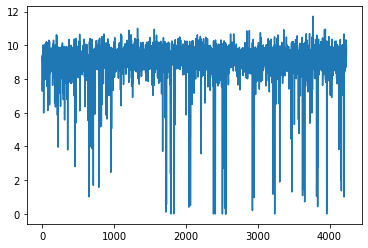

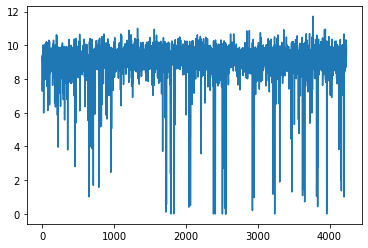

In [31]:
plt.plot(all_rewards)

In [89]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average(all_rewards,200))
#plt.plot([0, 5000], [9.5, 9.5], 'k-')
plt.show()

NameError: name 'all_rewards' is not defined

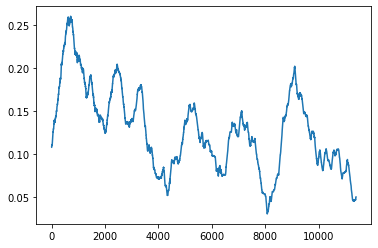

In [60]:
plt.plot(moving_average(pcnt_opt,600))
#plt.plot([0, 5000], [twap_stat, twap_stat], 'k-')
plt.show()

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size, agent_name):
        self.agent_name = agent_name
        self.state_size = state_size
        self.action_size = action_size
        # double-ended queue; acts like list, but elements can be added/removed from either end:
        self.memory = deque(maxlen=2000)
        # decay or discount rate: enables agent to take into account future actions in addition
        # to the immediate ones, but discounted at this rate:
        self.gamma = 1 # Was 0.95
        # exploration rate: how much to act randomly; more initially than later due to epsilon
        # decay:
        self.epsilon = 1.0
        # decrease number of random explorations as the agent's performance (hopefully)
        # improves over time:
        self.epsilon_decay = 0.998 
        # minimum amount of random exploration permitted:
        self.epsilon_min = 0.01
        # rate at which NN adjusts models parameters via SGD to reduce cost:
        self.learning_rate = 0.001
        self.model = self._build_model() # private method 
    
    def _build_model(self):
        # neural net to approximate Q-value function:
        model = Sequential()
        model.add(Dense(5, input_dim=self.state_size, activation='relu')) # 1st hidden layer; states as input
        model.add(Dense(5, activation='relu')) # 2nd hidden layer
        model.add(Dense(self.action_size, activation='linear')) # 2 actions, so 2 output neurons: 0 and 1 (L/R)
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        # list of previous experiences, enabling re-training later
        #print("State ", state, "Action ", action, "Reward ", reward, "next state ", next_state, "done", done)
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # if acting randomly, take random action:
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        # if not acting randomly, predict reward value based on current state:
        act_values = self.model.predict(state)
        # pick the action that will give the highest reward (i.e., go left or right?)
        return np.argmax(act_values[0])

    # method that trains NN with experiences sampled from memory:
    def replay(self, batch_size):
        # sample a minibatch from memory
        minibatch = random.sample(self.memory, batch_size)
        # extract data for each minibatch sample:
        for state, action, reward, next_state, done in minibatch:
            # if done (boolean whether game ended or not, i.e., whether final state or not), then target = reward:
            target = reward

            # if not done, then predict future discounted reward
            if not done:
                target = (reward + self.gamma * # (target) = reward + (discount rate gamma) * 
                          np.amax(self.model.predict(next_state)[0])) # (maximum target Q based on future action a')
            target_f = self.model.predict(state) # approximately map current state to future discounted reward
            #print("state", state, "reward: ", reward, "done ", done, "predict ", self.model.predict(next_state)[0])
            target_f[0][action] = target
            # Change the action taken to the reward + predicted max of next states
            # single epoch of training with x=state, y=target_f; fit decreases loss btwn target_f and y_hat:
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, file_name):
        self.model.load_weights(file_name)

    def save(self, file_name):
        self.model.save_weights(file_name)